descargamos el archivo desde el link de google drive proporcionado

In [282]:

from wget import download
from os import path, listdir

if not path.exists("Calidad_de_agua_2022.csv"):
    download("https://drive.google.com/uc?export=download&id=1aT6PJDaXfBu8-tZljO6dK4LZ51Bm29vk")
else:
  print("No vamos a bajar el archivo de agua ya que ya se encuentra en el directorio")



No vamos a bajar el archivo de agua ya que ya se encuentra en el directorio


en esta porcion de codigo imprimimos el dataset.

In [283]:
import pandas as pd
raw_dataset = pd.read_csv('Calidad_de_agua_2022.csv', sep=';')

#elimina  la columna inidicada entre '', si axis es 1 indica columna
raw_dataset = raw_dataset.drop('orden', axis=1) #No consideramos relevante el orden de las filas
raw_dataset = raw_dataset.drop('año', axis=1)   #Al tener la fecha exacta, no es relevante la columna
raw_dataset.head(20)

,sitios,codigo,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,Canal Villanueva y Río Luján,TI001,23/2/2022,Verano,24.5,23.3,5.3,6.56,Ausencia,Ausencia,...,6.2,29,90,<0.10,<0.005,<0.001,<10,<0.20,55,Muy deteriorada
1,Río Lujan y Arroyo Caraguatá,TI006,23/2/2022,Verano,25.4,23.3,2.25,6.56,Presencia,Presencia,...,5.8,29,34,<0.10,<0.005,<0.001,<10,<0.20,42,Extremadamente deteriorada
2,Canal Aliviador y Río Lujan,TI002,23/2/2022,Verano,24.6,23.3,2.94,6.59,Ausencia,Presencia,...,1.9,29,17,<0.10,<0.005,<0.001,<10,0.2,45,Muy deteriorada
3,Río Carapachay y Arroyo Gallo Fiambre,TI003,23/2/2022,Verano,25.2,23.3,2.22,7.45,Presencia,Presencia,...,5.8,29,23,<0.10,<0.005,<0.001,<10,<0.20,46,Muy deteriorada
4,Río Reconquista y Río Lujan,TI004,23/2/2022,Verano,24.1,20,1.02,6.39,Ausencia,Presencia,...,2.6,59,18,<0.10,<0.005,<0.001,<10,<0.20,44,Extremadamente deteriorada
5,Rio Tigre 100m antes del Rio Luján,TI005,23/2/2022,Verano,24.9,23.3,3.5,6.53,Ausencia,Ausencia,...,3.9,130,8.9,<0.10,<0.005,<0.001,<10,<0.20,40,Extremadamente deteriorada
6,Río Lujan y Canal San Fernando,TI007,23/2/2022,Verano,24.5,20,1.5,6.54,Ausencia,Presencia,...,3.5,42,12,<0.10,<0.005,<0.001,<10,0.4,35,Extremadamente deteriorada
7,Río Capitán y Río San Antonio,TI008,23/2/2022,Verano,24.5,21,6.3,6.48,Ausencia,Presencia,...,5.5,69,90,<0.10,<0.005,<0.001,<10,<0.20,46,Muy deteriorada
8,Arroyo Abra Vieja y Santa Rosa,TI009,23/2/2022,Verano,23.4,21,4.49,6.76,Ausencia,Ausencia,...,1.9,29,39,<0.10,<0.005,<0.001,<10,<0.20,58,Muy deteriorada
9,Del Arca,SF015,23/2/2022,Verano,21.5,23,3.85,6.66,Ausencia,Ausencia,...,1.9,29,28,<0.10,<0.005,<0.001,<10,<0.20,51,Muy deteriorada


In [284]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sitios                   168 non-null    object
 1   codigo                   168 non-null    object
 2   fecha                    168 non-null    object
 3   campaña                  168 non-null    object
 4   tem_agua                 168 non-null    object
 5   tem_aire                 166 non-null    object
 6   od                       168 non-null    object
 7   ph                       168 non-null    object
 8   olores                   168 non-null    object
 9   color                    168 non-null    object
 10  espumas                  168 non-null    object
 11  mat_susp                 168 non-null    object
 12  colif_fecales_ufc_100ml  167 non-null    object
 13  escher_coli_ufc_100ml    167 non-null    object
 14  enteroc_ufc_100ml        167 non-null    o

Vemos que son todos objetos. Vamos a tener que castear las variables cuantitativas, pero primero debemos limpiar sus columnas.

In [285]:
raw_dataset.duplicated().sum()

np.int64(0)

vimos que no hay filas duplicadas

In [286]:
raw_dataset.describe()

,sitios,codigo,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
count,168,168,168,168,168,166,168,168,168,168,...,167,168,168,168,168,168,167,168,155,154
unique,42,42,7,6,93,32,130,116,6,6,...,55,51,63,6,27,4,70,15,39,3
top,Canal Villanueva y Río Luján,TI001,23/2/2022,Verano,no se midió,14,no se midió,no se midió,Ausencia,Ausencia,...,no se midió,<30,no se midió,<0.10,<0.005,<0.001,<10,<0.15,40,Extremadamente deteriorada
freq,4,4,42,42,19,25,24,23,120,119,...,53,51,10,113,113,147,74,76,13,92


vemos a su vez anteriormente que hay valores nulos que no se representan por NaN, valores que significan lo mismo pero estan escrito diferente y demas problemas del tipo, por lo que a continuacion vamos a hacer una limpieza de los datos para poder trabajr sobre el dataset de manera prolija


instalados gdown, wget

con esto podemos ver la cantidad de valores nulos puros (NaN) que contiene cada columna del dataset, pero no todos los nulos estan representados con NaN, por lo que hay que desglosar para ver como se representan y luego reemplazarlos por NaN.

In [287]:

raw_dataset["microcistina_ug_l"].value_counts()


microcistina_ug_l
<0.15                   76
 <0.15                  33
<0.20                   30
no se midió             14
no midieron este día     4
1                        2
0.2                      1
0.3                      1
0.4                      1
 0.21                    1
1.67                     1
 0.25                    1
 0.57                    1
 0.23                    1
0.19                     1
Name: count, dtype: int64

In [288]:
raw_dataset["turbiedad_ntu"].value_counts()

turbiedad_ntu
no se midió             10
12                       7
19                       6
22                       6
45                       6
17                       5
23                       5
28                       5
26                       5
13                       5
90                       5
60                       5
25                       5
34                       4
39                       4
30                       4
no midieron este día     4
16                       4
18                       4
65                       3
50                       3
14                       3
35                       3
75                       3
33                       3
29                       3
37                       3
70                       3
31                       3
85                       2
11                       2
55                       2
27                       2
80                       2
130                      1
36                       1
7.5           

imprimimos las frecuencias absolutas de cada valor de las diferentes columnas,con esto podremos ver como esta representados los valores que hay que limpiar que mencionamos anteriormente

In [289]:
#import pandas as pd

# copiamos el conjunto para preservarlo
preprocessed_dataset = raw_dataset.copy()
# acomodamos la columna de competitors
valores_a_reemplazar = {'no se midió': pd.NA, 'no midieron este día': pd.NA, 'No se midió': pd.NA, 'no midio la sonda': pd.NA, 'no se determinó': pd.NA}
preprocessed_dataset['campaña'] = preprocessed_dataset['campaña'].replace(valores_a_reemplazar)
preprocessed_dataset['tem_aire'] = preprocessed_dataset['tem_aire'].replace(valores_a_reemplazar)
preprocessed_dataset['tem_agua'] = preprocessed_dataset['tem_agua'].replace(valores_a_reemplazar)
preprocessed_dataset['ph'] = preprocessed_dataset['ph'].replace(valores_a_reemplazar)
preprocessed_dataset['od'] = preprocessed_dataset['od'].replace(valores_a_reemplazar)
preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace(valores_a_reemplazar)
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace(valores_a_reemplazar)
preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace(valores_a_reemplazar)
preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace(valores_a_reemplazar)
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].replace(valores_a_reemplazar)
preprocessed_dataset['escher_coli_ufc_100ml'] = preprocessed_dataset['escher_coli_ufc_100ml'].replace(valores_a_reemplazar)
preprocessed_dataset['enteroc_ufc_100ml'] = preprocessed_dataset['enteroc_ufc_100ml'].replace(valores_a_reemplazar)
preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].replace(valores_a_reemplazar)
preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].replace(valores_a_reemplazar)
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace(valores_a_reemplazar)

preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace(valores_a_reemplazar)
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(valores_a_reemplazar)
preprocessed_dataset['ica'] = preprocessed_dataset['ica'].replace(valores_a_reemplazar)

colif_fecales_ufc_100ml, escher_coli_ufc_100ml, enteroc_ufc_100ml, nitrato_mg_l, nh4_mg_l 
son todas columnas que indican o pueden indicar contaminacion, a tener en cuenta para complementar hipotesis de causas de contaminacion.

en estas lineas de codigo estamos limpiando el dataset, reemplazando todos los valores nulos que no estan representados como tales por NaN.
La columna fecha quedo sin limpiar, pero no le veo sentido hacerlo

In [290]:
valores_reemp = {'Ausente': 'Ausencia', 'ausencia' : 'Ausencia', 'Presencia ' : 'Presencia','presencia' : 'Presencia'}
preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace(valores_reemp)
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace(valores_reemp)
preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace(valores_reemp)
preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace(valores_reemp)


Detectamos que en varias columnas hay muchos valores que refieren al mismo significado (como ausencia, Ausente, Ausencia) sin agregar informacion extra, por lo que utilizamos un unico valor para emprolijar el dataset.

revisar, en la columna dqo_mg_l hay valores <30 y con valor 29 en distintas categorias.
La columna hidr_deriv_petr_ug_l tiene un problem con el valor <0.10
El mismo problema en la columna microcistina_ug_l
en la columna cr_total_mg_l hay un valor q dice <5.0 y todos sus valores son menor a eso, no tiene sentido
en la columna nh4_mg_l (presencia de amoniaco, contaminacion organica) hay un valor <0.05 y 12 valores 0.049, hay q ver si los metemos todos juntos

In [291]:
preprocessed_dataset['olores'] = (preprocessed_dataset['olores'] == 'Presencia').astype(int)
preprocessed_dataset['color'] = (preprocessed_dataset['color'] == 'Presencia').astype(int)
preprocessed_dataset['espumas'] = (preprocessed_dataset['espumas'] == 'Presencia').astype(int)
preprocessed_dataset['mat_susp'] = (preprocessed_dataset['mat_susp'] == 'Presencia').astype(int)


con este codigo pasamos una variable categorica (como 'olores') a booleana, ya que en esta columna solamente se indica la prescencia o ausencia de olores
lo mismo para las columnas espumas, color, mat_susp.
1 indica presencia y 0 ausencia

In [292]:
preprocessed_dataset = pd.get_dummies(preprocessed_dataset, columns=['calidad_de_agua'])

como la columna contaba solo con 3 valores (Deteriorada, muy deteriorada y extremadamente deteriorada) converti esas variables a dummies para poder trabajr mas comodo

In [293]:

# Supongamos que tienes un DataFrame llamado df
preprocessed_dataset['num_nan'] = preprocessed_dataset.isnull().sum(axis=1)

agrego una columna que me indique la cantidad de nulls de cada fila

In [294]:
aux = preprocessed_dataset[["sitios","num_nan", "tem_agua", "tem_aire", "od", "ph", "olores", "color", "espumas", "mat_susp" ,"colif_fecales_ufc_100ml" ,"escher_coli_ufc_100ml" ,"enteroc_ufc_100ml" ,"nitrato_mg_l", "nh4_mg_l", "calidad_de_agua_Deteriorada" ,"calidad_de_agua_Extremadamente deteriorada" ,"calidad_de_agua_Muy deteriorada"]]

In [295]:
preprocessed_dataset.head(20)

,sitios,codigo,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,...,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua_Deteriorada,calidad_de_agua_Extremadamente deteriorada,calidad_de_agua_Muy deteriorada,num_nan
0,Canal Villanueva y Río Luján,TI001,23/2/2022,Verano,24.5,23.3,5.3,6.56,0,0,...,<0.10,<0.005,<0.001,<10,<0.20,55,False,False,True,0
1,Río Lujan y Arroyo Caraguatá,TI006,23/2/2022,Verano,25.4,23.3,2.25,6.56,1,1,...,<0.10,<0.005,<0.001,<10,<0.20,42,False,True,False,0
2,Canal Aliviador y Río Lujan,TI002,23/2/2022,Verano,24.6,23.3,2.94,6.59,0,1,...,<0.10,<0.005,<0.001,<10,0.2,45,False,False,True,0
3,Río Carapachay y Arroyo Gallo Fiambre,TI003,23/2/2022,Verano,25.2,23.3,2.22,7.45,1,1,...,<0.10,<0.005,<0.001,<10,<0.20,46,False,False,True,0
4,Río Reconquista y Río Lujan,TI004,23/2/2022,Verano,24.1,20,1.02,6.39,0,1,...,<0.10,<0.005,<0.001,<10,<0.20,44,False,True,False,0
5,Rio Tigre 100m antes del Rio Luján,TI005,23/2/2022,Verano,24.9,23.3,3.5,6.53,0,0,...,<0.10,<0.005,<0.001,<10,<0.20,40,False,True,False,0
6,Río Lujan y Canal San Fernando,TI007,23/2/2022,Verano,24.5,20,1.5,6.54,0,1,...,<0.10,<0.005,<0.001,<10,0.4,35,False,True,False,0
7,Río Capitán y Río San Antonio,TI008,23/2/2022,Verano,24.5,21,6.3,6.48,0,1,...,<0.10,<0.005,<0.001,<10,<0.20,46,False,False,True,0
8,Arroyo Abra Vieja y Santa Rosa,TI009,23/2/2022,Verano,23.4,21,4.49,6.76,0,0,...,<0.10,<0.005,<0.001,<10,<0.20,58,False,False,True,0
9,Del Arca,SF015,23/2/2022,Verano,21.5,23,3.85,6.66,0,0,...,<0.10,<0.005,<0.001,<10,<0.20,51,False,False,True,0


consideramos que los individuos que contengan mas de 15 valores nulos no aportan mucha informacion, por lo que se pueden eliminar

In [296]:
# Supongamos que la columna se llama 'columna_a_filtrar'
filas_filtradas = preprocessed_dataset[preprocessed_dataset['num_nan'] >= 15]
indices_a_eliminar = filas_filtradas.index
preprocessed_dataset.drop(index=indices_a_eliminar, inplace=True)

vemos que se limpiaron los indicadores de nulos.

In [297]:
preprocessed_dataset["tem_agua"].value_counts()


tem_agua
10       7
20       6
18.5     5
18.6     5
17       4
23       3
15.6     3
24.7     3
24.5     3
18.2     3
14.3     3
17.1     3
18.3     2
16       2
12.7     2
14.6     2
7        2
16.1     2
17.8     2
17.4     2
16.4     2
8        2
21.5     2
26.1     2
23.4     2
25.4     2
20.4     2
21       2
15.1     2
18.4     2
26       1
25.1     1
25.8     1
24       1
27.4     1
25.7     1
26.3     1
24.6     1
24.9     1
24.1     1
25.2     1
27       1
19.6     1
24.2     1
23.9     1
22       1
13.6     1
16.7     1
15.8     1
15.3     1
13.3     1
13.8     1
6        1
14.4     1
17.9     1
17.5     1
17.7     1
14.5     1
13.1     1
16.3     1
13.5     1
16.5     1
15.7     1
16.6     1
15.03    1
14.9     1
13.4     1
11.01    1
13.9     1
10.01    1
13       1
12.8     1
14.2     1
14.06    1
11       1
12       1
20.9     1
9        1
20.2     1
19.7     1
19       1
19.2     1
19.4     1
18.89    1
18.43    1
15.04    1
18.06    1
18.7     1
17.2     1
18       1
N

In [298]:
preprocessed_dataset['tem_agua'] = pd.to_numeric(preprocessed_dataset['tem_agua'], errors='coerce')
#preprocessed_dataset['tem_agua'].fillna(preprocessed_dataset['tem_agua'].mean(), inplace=True)
preprocessed_dataset['tem_agua'] = preprocessed_dataset['tem_agua'].astype(float)
preprocessed_dataset['ph'] = pd.to_numeric(preprocessed_dataset['ph'], errors='coerce')
preprocessed_dataset['ph'] = preprocessed_dataset['ph'].astype(float)
preprocessed_dataset['tem_aire'] = pd.to_numeric(preprocessed_dataset['tem_aire'], errors='coerce')
preprocessed_dataset['tem_aire'] = preprocessed_dataset['tem_aire'].astype(float)
preprocessed_dataset['od'] = pd.to_numeric(preprocessed_dataset['od'], errors='coerce')
preprocessed_dataset['od'] = preprocessed_dataset['od'].astype(float)
preprocessed_dataset["colif_fecales_ufc_100ml"] = preprocessed_dataset["colif_fecales_ufc_100ml"].astype("Int64")
preprocessed_dataset["escher_coli_ufc_100ml"] = preprocessed_dataset["escher_coli_ufc_100ml"].astype("Int64")
preprocessed_dataset["enteroc_ufc_100ml"] = preprocessed_dataset["enteroc_ufc_100ml"].astype("Int64")
preprocessed_dataset["nitrato_mg_l"] = pd.to_numeric(preprocessed_dataset["nitrato_mg_l"], errors='coerce') 
preprocessed_dataset["nitrato_mg_l"] = preprocessed_dataset["nitrato_mg_l"].astype(float)
preprocessed_dataset["nh4_mg_l"] = pd.to_numeric(preprocessed_dataset["nh4_mg_l"], errors='coerce')
preprocessed_dataset["nh4_mg_l"] = preprocessed_dataset["nh4_mg_l"].astype(float)
preprocessed_dataset["p_total_l_mg_l"] = pd.to_numeric(preprocessed_dataset["p_total_l_mg_l"], errors='coerce')
preprocessed_dataset["p_total_l_mg_l"] = preprocessed_dataset["p_total_l_mg_l"].astype(float)
preprocessed_dataset["fosf_ortofos_mg_l"] = pd.to_numeric(preprocessed_dataset["fosf_ortofos_mg_l"], errors='coerce')
preprocessed_dataset["fosf_ortofos_mg_l"] = preprocessed_dataset["fosf_ortofos_mg_l"].astype(float)
preprocessed_dataset["dbo_mg_l"] = pd.to_numeric(preprocessed_dataset["dbo_mg_l"], errors='coerce')
preprocessed_dataset["dbo_mg_l"] = preprocessed_dataset["dbo_mg_l"].astype(float)
#preprocessed_dataset["dqo_mg_l"] = preprocessed_dataset["dqo_mg_l"].astype("Int64") #se ve después porque tiene valores no numéricos
preprocessed_dataset["turbiedad_ntu"] = pd.to_numeric(preprocessed_dataset["turbiedad_ntu"], errors='coerce')
preprocessed_dataset["turbiedad_ntu"] = preprocessed_dataset["turbiedad_ntu"].astype("float")
preprocessed_dataset["ica"] = preprocessed_dataset["ica"].astype("Int64")

Se limpiaron los cuanntitativos

In [299]:
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 167
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   sitios                                      154 non-null    object 
 1   codigo                                      154 non-null    object 
 2   fecha                                       154 non-null    object 
 3   campaña                                     154 non-null    object 
 4   tem_agua                                    144 non-null    float64
 5   tem_aire                                    143 non-null    float64
 6   od                                          131 non-null    float64
 7   ph                                          111 non-null    float64
 8   olores                                      154 non-null    int64  
 9   color                                       154 non-null    int64  
 10  espumas            

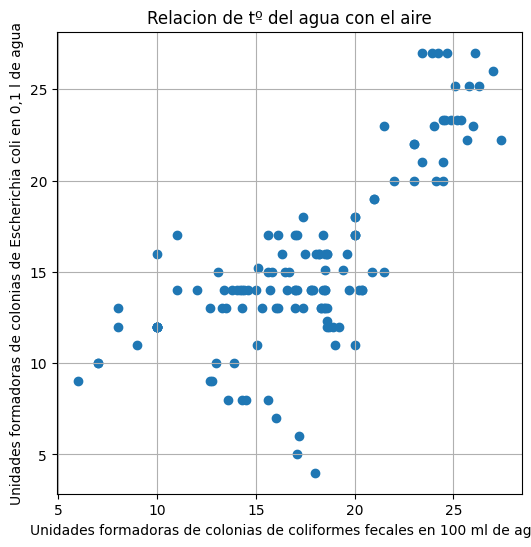

In [300]:
import matplotlib.pyplot as plt
mask = preprocessed_dataset['tem_agua'].notnull() & preprocessed_dataset['escher_coli_ufc_100ml'].notnull()
#plt.plot(preprocessed_dataset[mask]["colif_fecales_ufc_100ml"], preprocessed_dataset[mask]["escher_coli_ufc_100ml"])
plt.figure(figsize=(6,6))
plt.scatter(preprocessed_dataset[mask]["tem_agua"], preprocessed_dataset[mask]["tem_aire"])
plt.xlabel("Unidades formadoras de colonias de coliformes fecales en 100 ml de agua")
plt.ylabel("Unidades formadoras de colonias de Escherichia coli en 0,1 l de agua")

plt.title("Relacion de tº del agua con el aire")
plt.grid(True)

plt.show()

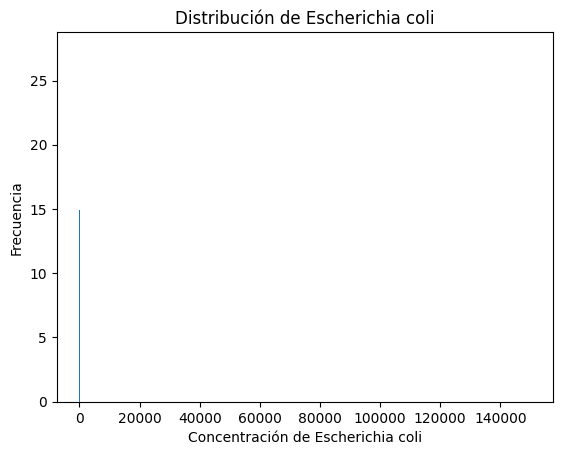

In [301]:
mask = preprocessed_dataset['escher_coli_ufc_100ml'].notnull() & preprocessed_dataset['tem_agua'].notnull()
plt.bar(preprocessed_dataset[mask]["escher_coli_ufc_100ml"],preprocessed_dataset[mask]["tem_agua"])
plt.title('Distribución de Escherichia coli')
plt.xlabel('Concentración de Escherichia coli')
plt.ylabel('Frecuencia')
plt.show()

In [302]:
preprocessed_dataset['escher_coli_ufc_100ml']=pd.to_numeric(preprocessed_dataset['escher_coli_ufc_100ml'], errors='coerce')

In [303]:
preprocessed_dataset['colif_fecales_ufc_100ml']=pd.to_numeric(preprocessed_dataset['colif_fecales_ufc_100ml'], errors='coerce')

In [304]:
preprocessed_dataset['enteroc_ufc_100ml']=pd.to_numeric(preprocessed_dataset['enteroc_ufc_100ml'], errors='coerce')

In [305]:
preprocessed_dataset.head(50)

,sitios,codigo,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,...,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua_Deteriorada,calidad_de_agua_Extremadamente deteriorada,calidad_de_agua_Muy deteriorada,num_nan
0,Canal Villanueva y Río Luján,TI001,23/2/2022,Verano,24.5,23.3,5.30,6.56,0,0,...,<0.10,<0.005,<0.001,<10,<0.20,55,False,False,True,0
1,Río Lujan y Arroyo Caraguatá,TI006,23/2/2022,Verano,25.4,23.3,2.25,6.56,1,1,...,<0.10,<0.005,<0.001,<10,<0.20,42,False,True,False,0
2,Canal Aliviador y Río Lujan,TI002,23/2/2022,Verano,24.6,23.3,2.94,6.59,0,1,...,<0.10,<0.005,<0.001,<10,0.2,45,False,False,True,0
3,Río Carapachay y Arroyo Gallo Fiambre,TI003,23/2/2022,Verano,25.2,23.3,2.22,7.45,1,1,...,<0.10,<0.005,<0.001,<10,<0.20,46,False,False,True,0
4,Río Reconquista y Río Lujan,TI004,23/2/2022,Verano,24.1,20.0,1.02,6.39,0,1,...,<0.10,<0.005,<0.001,<10,<0.20,44,False,True,False,0
5,Rio Tigre 100m antes del Rio Luján,TI005,23/2/2022,Verano,24.9,23.3,3.50,6.53,0,0,...,<0.10,<0.005,<0.001,<10,<0.20,40,False,True,False,0
6,Río Lujan y Canal San Fernando,TI007,23/2/2022,Verano,24.5,20.0,1.50,6.54,0,1,...,<0.10,<0.005,<0.001,<10,0.4,35,False,True,False,0
7,Río Capitán y Río San Antonio,TI008,23/2/2022,Verano,24.5,21.0,6.30,6.48,0,1,...,<0.10,<0.005,<0.001,<10,<0.20,46,False,False,True,0
8,Arroyo Abra Vieja y Santa Rosa,TI009,23/2/2022,Verano,23.4,21.0,4.49,6.76,0,0,...,<0.10,<0.005,<0.001,<10,<0.20,58,False,False,True,0
9,Del Arca,SF015,23/2/2022,Verano,21.5,23.0,3.85,6.66,0,0,...,<0.10,<0.005,<0.001,<10,<0.20,51,False,False,True,0


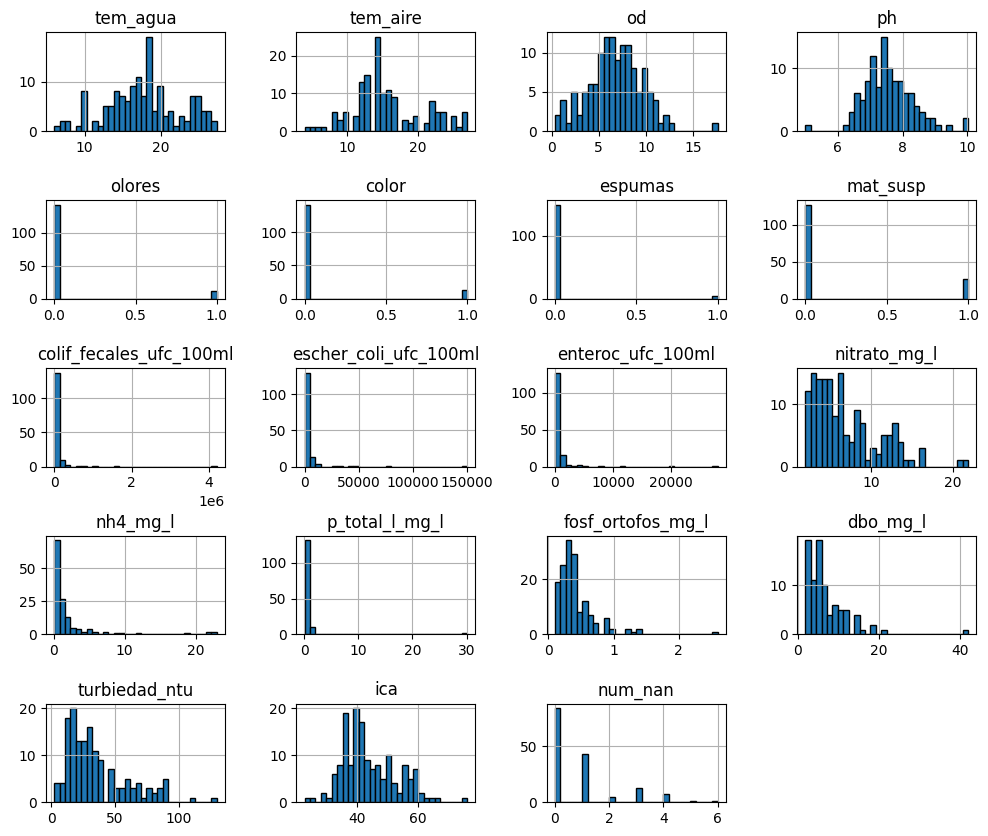

In [306]:
preprocessed_dataset.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

ARRANCAMOS ANALISIS UNIVARIADO:

In [307]:
preprocessed_dataset.describe()

,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,turbiedad_ntu,ica,num_nan
count,144.000000,143.000000,131.000000,111.000000,154.000000,154.000000,154.000000,154.000000,153.0,153.0,153.0,151.000000,138.00000,144.000000,152.000000,88.000000,149.000000,154.0,154.000000
mean,17.763403,15.714685,6.758397,7.570721,0.077922,0.084416,0.032468,0.175325,86690.228758,4093.392157,951.705882,6.797351,2.16042,0.903056,0.419605,7.065909,35.240268,44.071429,0.850649
std,4.810831,5.055021,2.843796,0.773819,0.268923,0.278917,0.177817,0.381485,381271.212141,15058.086505,3008.483046,4.042803,4.29987,3.498971,0.308566,5.671544,24.106259,8.948734,1.256525
min,6.000000,4.000000,0.360000,5.000000,0.000000,0.000000,0.000000,0.000000,80.0,1.0,2.0,1.900000,0.04900,0.100000,0.100000,1.900000,2.500000,23.0,0.000000
25%,14.600000,13.000000,5.060000,7.070000,0.000000,0.000000,0.000000,0.000000,1200.0,100.0,50.0,3.700000,0.22250,0.270000,0.237500,3.500000,18.000000,38.0,0.000000
50%,17.850000,14.000000,6.700000,7.480000,0.000000,0.000000,0.000000,0.000000,4000.0,330.0,300.0,5.700000,0.78500,0.385000,0.335000,5.550000,28.000000,42.0,0.000000
75%,20.400000,18.500000,8.590000,8.005000,0.000000,0.000000,0.000000,0.000000,40000.0,1700.0,670.0,8.750000,1.97500,0.575000,0.500000,9.325000,45.000000,50.0,1.000000
max,27.400000,27.000000,17.610000,10.020000,1.000000,1.000000,1.000000,1.000000,4200000.0,150000.0,28000.0,21.900000,23.00000,30.120000,2.600000,42.000000,130.000000,76.0,6.000000


SITIOS:  Localización específica donde se realizó el muestreo del agua. Categórica nominal

In [308]:
preprocessed_dataset["sitios"].value_counts()

sitios
Canal Villanueva y Río Luján                 4
Río Lujan y Arroyo Caraguatá                 4
Canal Aliviador y Río Lujan                  4
Río Carapachay y Arroyo Gallo Fiambre        4
Río Reconquista y Río Lujan                  4
Rio Tigre 100m antes del Rio Luján           4
Río Lujan y Canal San Fernando               4
Río Capitán y Río San Antonio                4
Arroyo Abra Vieja y Santa Rosa               4
Del Arca                                     4
Reserva Barrio El Ceibo                      4
Costa y Melo                                 4
Puerto de Olivos Espigón                     4
Arroyo Sarandí                               4
Costa de Villa Domínico                      4
Escollera de Propaneros                      4
Polo Petroquímico Dock Sud                   4
Arroyo Santo Domingo                         4
Espora 400 m                                 4
Camping Eva Perón                            4
Boca Cerrada (Res.Nat. Punta Lara)           4
Costan

Vemos que hay zonas con cercanías. Buscamos puntos de encuentro que se repitan

In [309]:
from collections import Counter

# Supongamos que raw_dataset es tu DataFrame y 'columna_texto' es la columna que contiene las oraciones
all_words = ' '.join(preprocessed_dataset['sitios']).split()
word_counts = Counter(all_words)

# Convertir el resultado a un DataFrame para una mejor visualización
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Palabra', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)
pd.set_option('display.max_rows', None)
# Mostrar el conteo de palabras
print(word_counts_df)

          Palabra  Frecuencia
2               y          40
3             Río          36
36             de          27
6          Arroyo          24
5           Lujan          16
0           Canal          12
39          Costa          12
65              m          12
64            400          12
48           Club          11
44      Costanera          10
28        Reserva          10
97          Playa          10
46              -          10
38        Espigón           9
18            San           8
13            Rio           8
98             La           8
68          Calle           8
90      Balneario           8
33             El           8
4           Luján           8
35         Puerto           7
29      Ecológica           6
7       Caraguatá           4
8       Aliviador           4
25           Rosa           4
24          Santa           4
23          Vieja           4
22           Abra           4
21        Antonio           4
20        Capitán           4
19       F

No se aprecian grupos muy grandes, a excepción de Luján, o cercanía a rios, arroyos o playa y demases. Se crea una columna nueva, si está cerca del mar el agua es duvle.

In [310]:
# Definir las palabras clave
keywords = ['Playa', 'Costanera', 'Costa', 'Camping', 'Pescadores']

# Crear una expresión regular que busque cualquiera de las palabras clave
pattern = '|'.join(keywords)

# Crear la nueva columna binaria
preprocessed_dataset['es_dulce'] = preprocessed_dataset['sitios'].str.contains(pattern, case=False, regex=True).astype(int)

# Verificar los cambios
print(preprocessed_dataset[['sitios', 'es_dulce']])

                                        sitios  es_dulce
0                 Canal Villanueva y Río Luján         0
1                 Río Lujan y Arroyo Caraguatá         0
2                  Canal Aliviador y Río Lujan         0
3        Río Carapachay y Arroyo Gallo Fiambre         0
4                  Río Reconquista y Río Lujan         0
5           Rio Tigre 100m antes del Rio Luján         0
6               Río Lujan y Canal San Fernando         0
7                Río Capitán y Río San Antonio         0
8               Arroyo Abra Vieja y Santa Rosa         0
9                                     Del Arca         0
11                           Reserva Ecológica         0
13                                 Perú Puente         0
14                     Reserva Barrio El Ceibo         0
15                    Puerto de Olivos Espigón         0
16                                Costa y Melo         1
17                         Parque de los Niños         0
18           Costanera Norte - 

CODIGO: Identificador único para cada muestra o estación de muestreo. Categórico nominal.

In [311]:
preprocessed_dataset["codigo"].value_counts()

codigo
TI001       4
TI006       4
TI002       4
TI003       4
TI004       4
TI005       4
TI007       4
TI008       4
TI009       4
SF015       4
VL033       4
VL031       4
VL032       4
AV052       4
AV055       4
AV054       4
AV051       4
AV053       4
QU061       4
EN081       4
EN-extra    4
BZ080       4
BZ078       4
QU063       4
QU062       4
EN084       4
BS092       4
BS095       4
BS091       4
BS094       4
BS093       4
EN082       4
EN083       4
SI023       3
CA047       3
CA044       3
CA046       3
BZ077       3
SI022       3
CA041       2
SI024       2
Name: count, dtype: int64

Al haber varias muestras de cada tipo de agua, al no haber filas repetidas, se considera que son de distintas muestras en el tiempo. Se evaluará luego.

In [375]:
preprocessed_dataset['codigo'] = preprocessed_dataset['codigo'].replace('EN-extra', '0')
if preprocessed_dataset['codigo'].dtype != 'Int64':
    preprocessed_dataset['codigo'] = preprocessed_dataset['codigo'].str.replace(r'[^\d]', '', regex=True)
preprocessed_dataset["codigo"] = preprocessed_dataset["codigo"].astype("Int64")

# Verificar los cambios
preprocessed_dataset["codigo"].value_counts()

codigo
1     4
6     4
2     4
3     4
4     4
5     4
7     4
8     4
9     4
15    4
33    4
31    4
32    4
52    4
55    4
54    4
51    4
53    4
61    4
81    4
0     4
80    4
78    4
63    4
62    4
84    4
92    4
95    4
91    4
94    4
93    4
82    4
83    4
23    3
47    3
44    3
46    3
77    3
22    3
41    2
24    2
Name: count, dtype: Int64

FECHA: Fecha en la que se tomó la muestra de agua. Variable discreta

In [313]:
preprocessed_dataset["fecha"].value_counts()

fecha
4/5/2022      41
23/2/2022     39
23/8/2022     37
31/10/2022    35
31/10/0202     2
Name: count, dtype: int64

Las filas que tiene entradas ilógicas se arreglan sus valores, ya que quedaría una fecha con sentido en el contexto del análisis 

In [314]:
preprocessed_dataset['fecha'] = preprocessed_dataset['fecha'].str.replace("31/10/0202", "31/10/2022")

In [315]:
preprocessed_dataset["fecha"].value_counts()

fecha
4/5/2022      41
23/2/2022     39
23/8/2022     37
31/10/2022    37
Name: count, dtype: int64

Al ver que solo hay 4 fechas, se  podria eliminar la columna de la estación del año, debido a que ya cada fecha corresponde a una estación. no se hace debido a que las esraciones son el fin de la investigacion

In [316]:
#preprocessed_dataset = preprocessed_dataset.drop('campaña', axis=1)

TEM_AGUA: Temperatura del agua en grados Celsius. Valor numérico continuo.

In [317]:
preprocessed_dataset["tem_agua"].value_counts()

tem_agua
10.00    7
20.00    6
18.50    5
18.60    5
17.00    4
23.00    3
15.60    3
24.70    3
24.50    3
18.20    3
14.30    3
17.10    3
18.30    2
16.00    2
12.70    2
14.60    2
7.00     2
16.10    2
17.80    2
17.40    2
16.40    2
8.00     2
21.50    2
26.10    2
23.40    2
25.40    2
20.40    2
21.00    2
15.10    2
18.40    2
26.00    1
25.10    1
25.80    1
24.00    1
27.40    1
25.70    1
26.30    1
24.60    1
24.90    1
24.10    1
25.20    1
27.00    1
19.60    1
24.20    1
23.90    1
22.00    1
13.60    1
16.70    1
15.80    1
15.30    1
13.30    1
13.80    1
6.00     1
14.40    1
17.90    1
17.50    1
17.70    1
14.50    1
13.10    1
16.30    1
13.50    1
16.50    1
15.70    1
16.60    1
15.03    1
14.90    1
13.40    1
11.01    1
13.90    1
10.01    1
13.00    1
12.80    1
14.20    1
14.06    1
11.00    1
12.00    1
20.90    1
9.00     1
20.20    1
19.70    1
19.00    1
19.20    1
19.40    1
18.89    1
18.43    1
15.04    1
18.06    1
18.70    1
17.20    1
18.00    1
N

Se pueden ver cinco valores inferiores a 9,20, que, según lo averigüado, es la mínima en estos últimos 4 años en el Río de la Plata. Como no pudimos contrastar con mucha evidencia, decidimos no borrar las filas.

Buscamos la distribución de las muestras

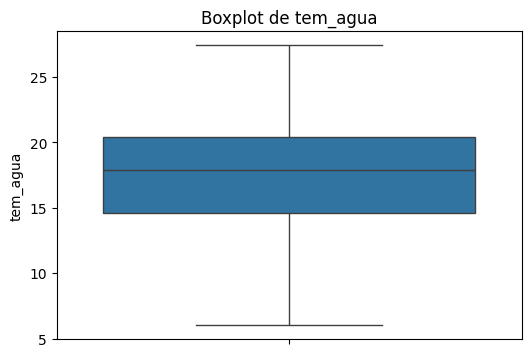

In [318]:
import seaborn as sns
# Crear el boxplot con Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot( y="tem_agua", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de tem_agua')
plt.ylabel('tem_agua')

# Mostrar el gráfico
plt.show()

Se aprecia una distribución de datos donde estos se encuentran simáetricamente alrededor de la mediana. No se ven valores atípicos. 

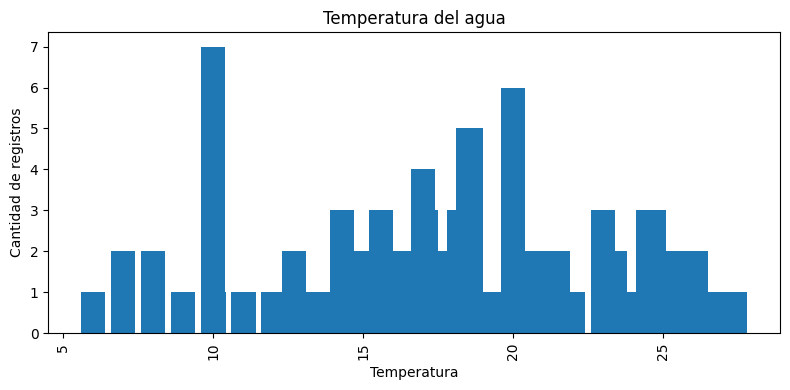

In [319]:
import matplotlib.pyplot as plt

# contamos las frecuencias de cada valor
agua_counts = preprocessed_dataset['tem_agua'].value_counts()

# ordenamos las frecuencias de mayor a menor
agua_counts = agua_counts.sort_values(ascending=False)

# graficamos el histograma
plt.figure(figsize=(8, 4))  # Ajusta el tamaño de la figura si es necesario
plt.bar(agua_counts.index, agua_counts.values)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel('Temperatura')
plt.ylabel('Cantidad de registros')
plt.title('Temperatura del agua')
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

Se ve que no tiene una distribuicón tan simáetrica como la pensada

TEM_AIRE: Temperatura del aire en grados Celsius. Valor numérico continuo

In [320]:
preprocessed_dataset["tem_aire"].value_counts()

tem_aire
14.0    25
13.0    15
12.0    12
16.0    11
17.0     9
15.0     7
22.0     6
10.0     5
8.0      5
27.0     5
23.3     5
23.0     5
20.0     4
11.0     4
18.0     3
25.2     3
9.0      3
15.1     2
19.0     2
21.0     2
22.2     2
25.0     1
26.0     1
15.2     1
12.3     1
7.0      1
6.0      1
4.0      1
5.0      1
Name: count, dtype: int64

Vemos el comportamiento generalizado según cada muestra.

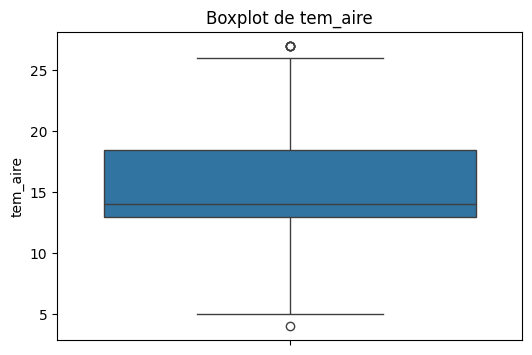

In [321]:
import seaborn as sns
# Crear el boxplot con Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot( y="tem_aire", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de tem_aire')
plt.ylabel('tem_aire')

# Mostrar el gráfico
plt.show()

Se ven dos outliers, al ser valores de temperatura que podrían ser reales, no se eliminan

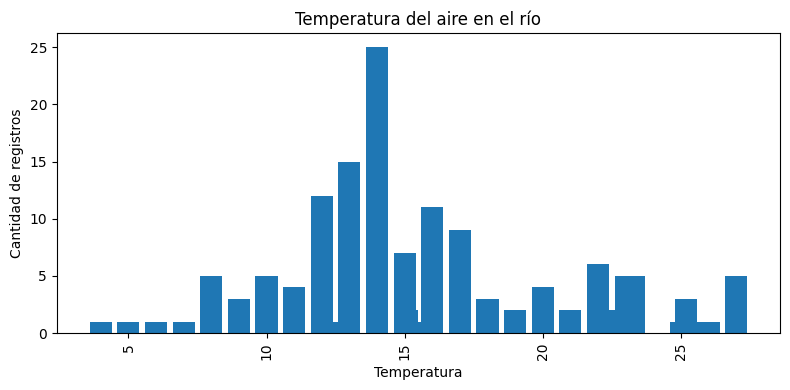

In [322]:
import matplotlib.pyplot as plt

# contamos las frecuencias de cada valor
aire_counts = preprocessed_dataset['tem_aire'].value_counts()

# ordenamos las frecuencias de mayor a menor
aire_counts = aire_counts.sort_values(ascending=False)

# graficamos el histograma
plt.figure(figsize=(8, 4))  # Ajusta el tamaño de la figura si es necesario
plt.bar(aire_counts.index, aire_counts.values)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel('Temperatura')
plt.ylabel('Cantidad de registros')
plt.title('Temperatura del aire en el río')
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

Se ve que los outliers no lo son necesariamente.

OD: Oxígeno disuelto, medido en miligramos por litro (mg/L), esencial para la vida acuática.

In [323]:
preprocessed_dataset['od'].value_counts().sort_index()

od
0.36     1
0.45     1
1.02     1
1.13     1
1.39     1
1.50     1
1.80     1
2.17     1
2.22     1
2.25     1
2.28     1
2.49     1
2.94     1
3.09     1
3.30     1
3.43     1
3.50     1
3.54     1
3.63     1
3.85     1
3.99     1
4.13     1
4.28     2
4.29     1
4.43     1
4.46     1
4.49     1
4.78     1
4.80     1
4.90     1
5.00     1
5.05     1
5.07     1
5.14     1
5.24     1
5.30     1
5.36     2
5.37     1
5.47     1
5.56     1
5.60     1
5.68     1
5.70     1
5.71     1
5.77     1
5.79     1
5.80     1
5.83     1
5.97     1
6.03     1
6.10     1
6.19     1
6.20     1
6.21     1
6.24     1
6.30     1
6.35     1
6.40     1
6.43     1
6.50     1
6.56     1
6.59     1
6.60     1
6.70     1
6.91     1
6.99     1
7.00     2
7.06     1
7.17     1
7.20     1
7.21     1
7.30     1
7.36     1
7.38     1
7.40     1
7.49     1
7.50     1
7.51     1
7.73     1
7.75     1
7.78     1
7.80     1
7.85     2
7.91     1
8.00     1
8.05     1
8.08     1
8.14     1
8.18     1
8.20     1
8.30   

El nivel de oxígeno dependerá de su tº, luego se analizará si es con sentido práctico o no debido a que la solubilidad del oxígeno en agua dulce varía entre 14.6 mg/L a 0°C hasta aproximadamente 7 mg/L a 35°C bajo una presión de 760 mmHg.

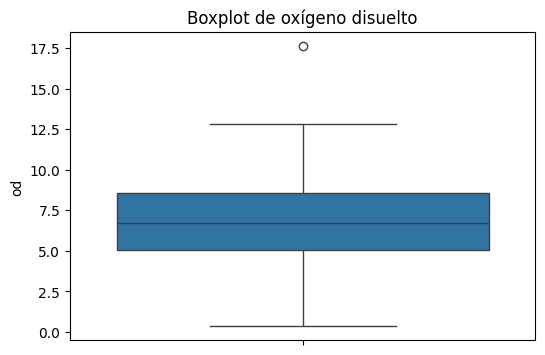

In [324]:
plt.figure(figsize=(6, 4))
sns.boxplot( y="od", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de oxígeno disuelto')
plt.ylabel('od')

# Mostrar el gráfico
plt.show()

 PH: Medida de la acidez o alcalinidad del agua, en una escala de 0 a 14. Numérico continuo. Mientras mas cercano a 0 mas ácida el agua, mientras mas alta mas alcalina.

In [325]:
preprocessed_dataset['ph'].value_counts().sort_index()

ph
5.00     1
6.20     1
6.37     1
6.39     1
6.48     1
6.53     1
6.54     1
6.56     2
6.59     1
6.66     1
6.72     1
6.74     1
6.76     2
6.80     1
6.85     1
6.88     1
6.90     1
6.92     1
6.93     1
6.94     1
7.00     2
7.02     1
7.03     1
7.05     1
7.06     1
7.08     1
7.09     1
7.10     1
7.12     2
7.13     1
7.14     1
7.16     1
7.23     1
7.25     1
7.29     1
7.30     3
7.32     1
7.39     1
7.40     6
7.42     1
7.43     1
7.45     1
7.46     1
7.47     1
7.48     1
7.50     2
7.51     1
7.52     1
7.55     1
7.58     1
7.60     4
7.61     1
7.66     1
7.75     1
7.76     3
7.80     2
7.81     1
7.84     1
7.91     1
7.93     1
7.94     1
7.99     3
8.00     1
8.01     1
8.02     1
8.09     1
8.11     2
8.13     1
8.14     1
8.20     1
8.22     1
8.23     1
8.27     1
8.31     1
8.32     1
8.37     1
8.44     1
8.47     1
8.50     1
8.52     1
8.59     1
8.62     1
8.81     1
8.83     1
8.95     1
9.01     1
9.16     1
9.39     1
9.98     1
10.02    1
Name: c

No se ven valores fuera de medida o de contexto a priori.

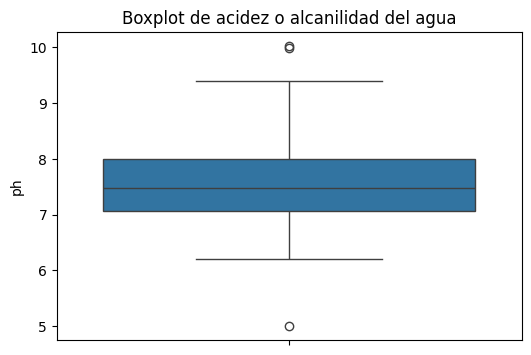

In [326]:
plt.figure(figsize=(6, 4))
sns.boxplot( y="ph", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de acidez o alcanilidad del agua')
plt.ylabel('ph')

# Mostrar el gráfico
plt.show()

Al ser posibles valores teóricos los outliers, no se los descarta.

OLORES: Presencia de olores en el agua, que puede mostrar contaminación. Binaria: 0 si no tiene olor, 1 si tiene olor. Categórico nominal.

In [327]:
preprocessed_dataset['olores'].value_counts()

olores
0    142
1     12
Name: count, dtype: int64

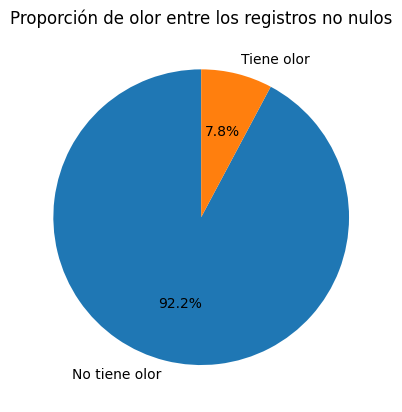

In [328]:
olor_counts = preprocessed_dataset["olores"].value_counts()

# Crear el gráfico de torta
labels = ["No tiene olor" if label == False else "Tiene olor" for label in olor_counts.index]
plt.pie(olor_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Agregar un título al gráfico
plt.title("Proporción de olor entre los registros no nulos")

# Mostrar el gráfico
plt.show()

COLOR: Color del agua, que puede ser un indicador de la calidad del agua. Binaria: 0 incolora, 1 colora. Atributo categórico nominal.

In [329]:
preprocessed_dataset['color'].value_counts()

color
0    141
1     13
Name: count, dtype: int64

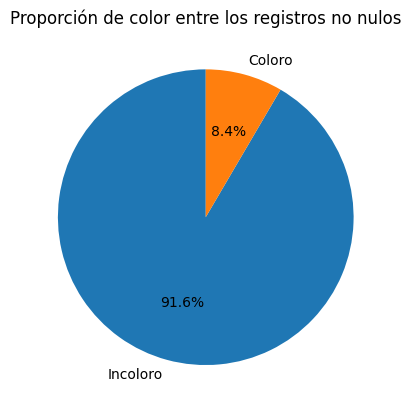

In [330]:
color_counts = preprocessed_dataset["color"].value_counts()

# Crear el gráfico de torta
labels = ["Incoloro" if label == False else "Coloro" for label in color_counts.index]
plt.pie(color_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Agregar un título al gráfico
plt.title("Proporción de color entre los registros no nulos")

# Mostrar el gráfico
plt.show()

ESPUMAS: Presencia de espumas en la superficie del agua, que puede ser un signo de contaminación. Atributo binarip. 0 si no contiene espumas, 1 si contiene. Categórico nominal

In [331]:
preprocessed_dataset['espumas'].value_counts()

espumas
0    149
1      5
Name: count, dtype: int64

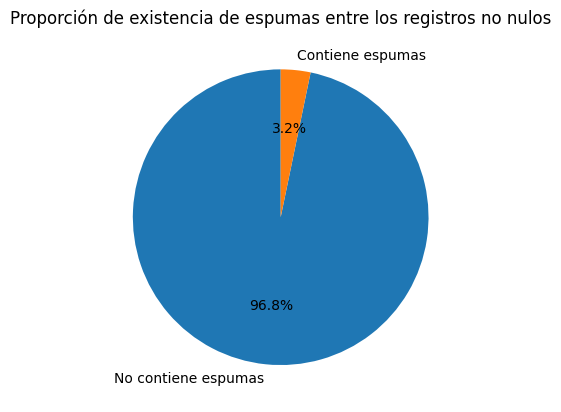

In [332]:
espumas_counts = preprocessed_dataset["espumas"].value_counts()

# Crear el gráfico de torta
labels = ["No contiene espumas" if label == False else "Contiene espumas" for label in espumas_counts.index]
plt.pie(espumas_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Agregar un título al gráfico
plt.title("Proporción de existencia de espumas entre los registros no nulos")

# Mostrar el gráfico
plt.show()

MAT_SUSP: Materia suspendida, que se refiere a partículas sólidas que flotan en el agua. Atributo binario: 0 si no contiene materia suspendida, 1 si contiene materia suspendida. Categórico nominal.

In [333]:
preprocessed_dataset['mat_susp'].value_counts()

mat_susp
0    127
1     27
Name: count, dtype: int64

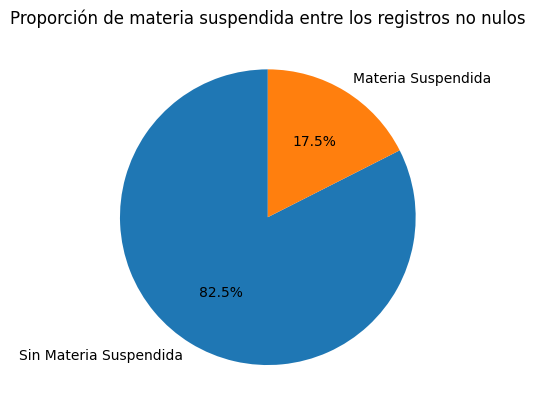

In [334]:
ms_counts = preprocessed_dataset["mat_susp"].value_counts()

# Crear el gráfico de torta
labels = ["Sin Materia Suspendida" if label == False else "Materia Suspendida" for label in ms_counts.index]
plt.pie(ms_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Agregar un título al gráfico
plt.title("Proporción de materia suspendida entre los registros no nulos")

# Mostrar el gráfico
plt.show()

COLIF FECALES UFC 100 ml: Unidades formadoras de colonias de coliformes fecales en 100 ml de agua, un indicador de contaminación fecal. Numérico Disceto

In [335]:
preprocessed_dataset["colif_fecales_ufc_100ml"].value_counts().sort_index()

colif_fecales_ufc_100ml
80         1
95         1
120        1
130        1
150        1
160        1
200        1
210        1
300        2
360        1
400        3
500        1
560        1
600        3
700        2
750        1
800        2
830        1
900        4
1000       5
1060       1
1100       2
1200       3
1300       4
1400       5
1600       3
1800       5
2100       1
2200       3
2400       2
2500       2
2600       1
2700       1
3000       4
3200       2
3500       2
3800       1
4000       3
4200       2
5000       2
5200       1
5500       1
6000       3
6500       3
6600       1
9000       1
10000      2
12000      1
13000      1
15200      1
16000      1
18000      1
19000      1
20000      6
26000      1
27000      2
28000      2
30000      2
40000      4
50000      2
58000      1
60000      1
68000      1
70000      2
76000      1
80000      2
90000      2
92000      1
96000      1
100000     1
103000     1
104000     1
106000     1
120000     1
150000     2
1

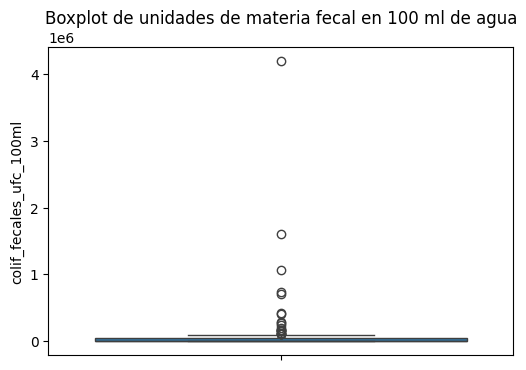

In [336]:
plt.figure(figsize=(6, 4))
sns.boxplot( y="colif_fecales_ufc_100ml", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de unidades de materia fecal en 100 ml de agua')
plt.ylabel('colif_fecales_ufc_100ml')

# Mostrar el gráfico
plt.show()

Debido a que los outliers no concuerdan con muestras tomadas en otros rios o en el Rio de La Plata mismo los eliminamos.

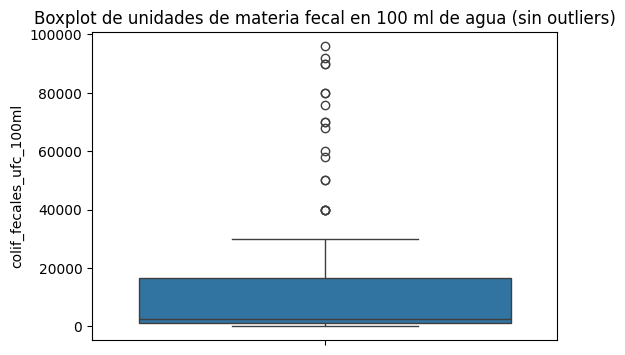

In [337]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = preprocessed_dataset['colif_fecales_ufc_100ml'].quantile(0.25)
Q3 = preprocessed_dataset['colif_fecales_ufc_100ml'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los outliers
filtered_data = preprocessed_dataset[(preprocessed_dataset['colif_fecales_ufc_100ml'] >= lower_bound) & (preprocessed_dataset['colif_fecales_ufc_100ml'] <= upper_bound)]

# Crear el boxplot sin outliers
plt.figure(figsize=(6, 4))
sns.boxplot(y='colif_fecales_ufc_100ml', data=filtered_data)

# Añadir título y etiquetas
plt.title('Boxplot de unidades de materia fecal en 100 ml de agua (sin outliers)')
plt.ylabel('colif_fecales_ufc_100ml')

# Mostrar el gráfico
plt.show()

ESCHER COLI UFC 100 ml: Unidades formadoras de colonias de Escherichia coli en 100 ml de agua, otro indicador de contaminación fecal. Numérico discreto.

In [338]:
preprocessed_dataset["escher_coli_ufc_100ml"].value_counts().sort_index()

escher_coli_ufc_100ml
1          1
2          2
3          3
4          1
5          1
6          4
9          1
13         1
15         1
16         1
18         1
20         1
30         2
35         1
50         2
60         1
70         1
80         3
90         1
100       17
110        2
130        1
150        1
160        1
186        1
200       15
230        1
290        1
300        6
330        2
370        1
400        3
430        1
440        1
500        4
560        1
600        5
700        3
720        1
800        3
820        1
850        1
930        1
1000       4
1100       1
1300       1
1350       1
1500       2
1600       2
1700       1
2000       3
2100       2
2300       1
2800       1
3000       1
3600       1
4000       1
4200       2
4500       1
5000       2
5200       2
6000       2
6200       1
6600       2
7000       1
8000       1
10000      4
11500      1
12000      1
14400      1
15000      1
28000      1
35000      1
44000      1
50000      1
800

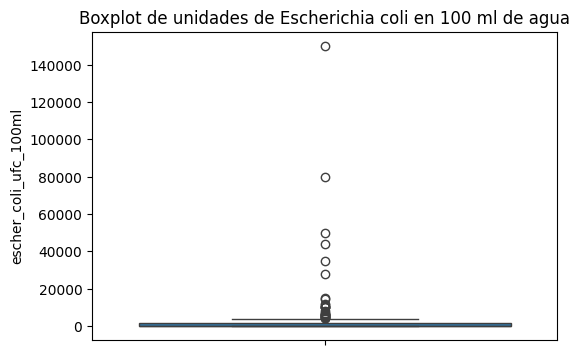

In [339]:
plt.figure(figsize=(6, 4))
sns.boxplot( y="escher_coli_ufc_100ml", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de unidades de Escherichia coli en 100 ml de agua')
plt.ylabel('escher_coli_ufc_100ml')

# Mostrar el gráfico
plt.show()

Debido a que los outliers no concuerdan con muestras tomadas en otros rios o en el Rio de La Plata mismo los eliminamos.

ENTEROC UFC 100 ML: Unidades formadoras de colonias de enterococos en 100 ml de agua, que también indican contaminación fecal. Atributo discreto.

In [340]:
preprocessed_dataset["enteroc_ufc_100ml"].value_counts().sort_index()

enteroc_ufc_100ml
2        5
3        1
4        1
5        2
9        1
10       6
11       1
20       5
24       1
27       1
30       4
40       3
45       2
50       6
80       3
90       2
100      7
110      2
113      1
120      1
130      2
140      2
160      2
180      2
190      1
220      2
230      1
240      1
250      2
260      2
270      2
300      6
310      1
320      1
350      2
360      1
370      2
380      3
400      2
420      1
440      1
450      2
460      1
480      1
500      1
550      1
560      1
570      2
580      2
600      3
610      1
620      1
640      2
650      1
660      1
670      1
700      1
730      2
750      1
760      1
770      1
780      1
800      3
850      2
960      1
1100     3
1160     1
1200     1
1440     1
1500     5
1540     1
1580     1
1700     1
1800     1
2200     1
2500     1
3300     1
4000     1
4200     1
5000     1
7500     1
12000    1
20000    1
28000    1
Name: count, dtype: Int64

nitrato mg l: Concentración de nitratos en miligramos por litro (mg/L), que puede indicar contaminación por fertilizantes. Cuantitativo continuo Según la OMS valores mayores a 50 mg/l se considera peligroso para la salud.

In [341]:

preprocessed_dataset['nitrato_mg_l'].value_counts()

nitrato_mg_l
3.3     5
5.1     4
1.9     4
5.9     4
3.7     4
3.9     4
2.9     3
5.6     3
5.2     3
2.0     3
6.1     3
2.6     3
2.7     3
8.5     3
3.6     3
4.9     2
3.1     2
4.4     2
5.4     2
6.5     2
6.2     2
3.4     2
11.5    2
6.9     2
10.0    2
4.0     2
4.6     2
8.6     2
8.8     2
7.7     2
11.3    2
4.7     2
8.2     2
5.7     2
6.3     2
8.0     2
12.2    2
2.8     2
12.6    2
10.8    2
2.1     2
13.2    2
4.1     2
4.3     2
13.3    2
8.9     1
7.4     1
7.3     1
6.0     1
4.5     1
2.2     1
13.1    1
12.1    1
5.8     1
11.9    1
9.7     1
9.1     1
10.1    1
7.1     1
8.3     1
2.4     1
8.7     1
21.9    1
8.4     1
12.5    1
6.4     1
6.8     1
3.0     1
13.0    1
11.7    1
13.7    1
16.4    1
12.8    1
20.6    1
16.3    1
13.5    1
16.2    1
14.8    1
14.4    1
5.0     1
2.5     1
4.2     1
3.2     1
7.2     1
Name: count, dtype: int64

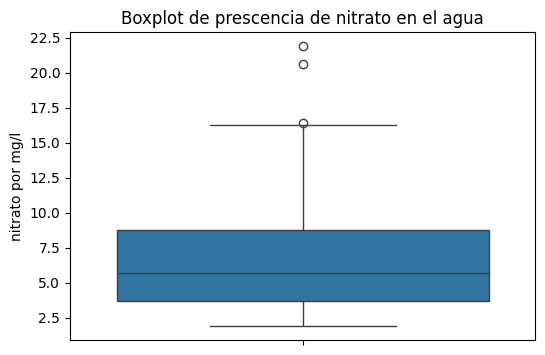

In [342]:
plt.figure(figsize=(6, 4))
sns.boxplot( y="nitrato_mg_l", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de prescencia de nitrato en el agua')
plt.ylabel('nitrato por mg/l')

# Mostrar el gráfico
plt.show()

Las muestras no sugieren contaminacion por fertilizantes en el agua.

nh4 mg l: Concentración de amonio en miligramos por litro (mg/L), que puede ser un indicador de contaminación orgánica. Valor cuantitativo continuo.

Según la OMS los valores recomendados de concentracion de amonio en el agua debe ser <0.2 mg/l para evitar sabores u olores extraños.

In [343]:
preprocessed_dataset['nh4_mg_l'].value_counts().sort_index()

nh4_mg_l
0.049     12
0.050      2
0.060      2
0.080      2
0.100      5
0.110      2
0.120      1
0.140      1
0.150      1
0.170      1
0.180      2
0.210      2
0.220      2
0.230      1
0.250      1
0.260      1
0.280      1
0.330      1
0.380      1
0.400      1
0.410      5
0.420      1
0.440      1
0.450      3
0.490      2
0.500      1
0.510      1
0.550      1
0.600      2
0.630      1
0.640      1
0.660      1
0.710      1
0.720      1
0.740      1
0.750      2
0.770      2
0.800      2
0.830      2
0.870      1
0.880      1
0.900      1
0.910      1
0.930      1
0.940      1
0.950      1
0.970      1
0.980      2
1.000      4
1.100      2
1.160      1
1.200      2
1.300      3
1.400      1
1.500      2
1.600      1
1.700      1
1.900      3
2.000      5
2.050      1
2.200      1
2.300      1
2.500      1
2.900      2
3.100      2
3.300      2
3.500      1
3.800      1
3.900      1
4.100      1
4.800      1
5.000      1
5.200      1
5.400      1
5.600      1
5.700      1
7.1

Se obvservan muchos valores mayores al 0.2 mg/l recomendados por la OMS

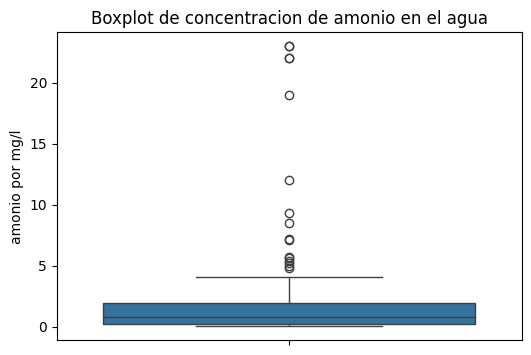

In [344]:
plt.figure(figsize=(6, 4))
sns.boxplot( y="nh4_mg_l", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de concentracion de amonio en el agua')
plt.ylabel('amonio por mg/l')

# Mostrar el gráfico
plt.show()


Los valores se concentran cerca del minimo y se observan muchos outliers, por lo que puede haber una relacion entre las altas concentraciones de amonio y los olores presentes en las muestras.

p_total_l_mg _l: Fósforo total en miligramos por litro (mg/L), que incluye todas las formas de fósforo en el agua. Cuantitativo continuo.

Valores altos de fosfato pueden producir eutrofización (crecimiento excesivo de algas debido a altos nutrientes), valores mayores a 0.03 indican aguas Altamente eutróficas. Estas aguas pueden estar en presencia de contaminantes de origen agrícolas.

In [345]:
preprocessed_dataset['p_total_l_mg_l'].value_counts().sort_index()

p_total_l_mg_l
0.10     1
0.11     1
0.12     1
0.13     2
0.14     1
0.15     1
0.17     2
0.18     2
0.19     3
0.20     1
0.21     1
0.22     2
0.23     6
0.24     5
0.25     3
0.26     3
0.27     4
0.28     4
0.29     3
0.30     1
0.31     3
0.32     2
0.33     8
0.34     2
0.35     3
0.36     4
0.37     2
0.38     1
0.39     3
0.40     3
0.41     1
0.42     3
0.43     2
0.44     1
0.45     2
0.47     2
0.48     1
0.49     3
0.51     3
0.52     2
0.53     2
0.54     3
0.55     2
0.57     3
0.59     2
0.60     1
0.62     1
0.63     1
0.65     2
0.67     1
0.69     1
0.70     1
0.71     1
0.73     1
0.76     1
0.77     1
0.78     1
0.79     1
0.80     1
0.85     1
0.86     2
0.88     1
0.95     1
1.10     1
1.20     4
1.30     2
1.40     2
1.50     1
1.90     1
2.80     1
30.12    2
Name: count, dtype: int64

Se observa que todos los valores son mayores a los valores normales.

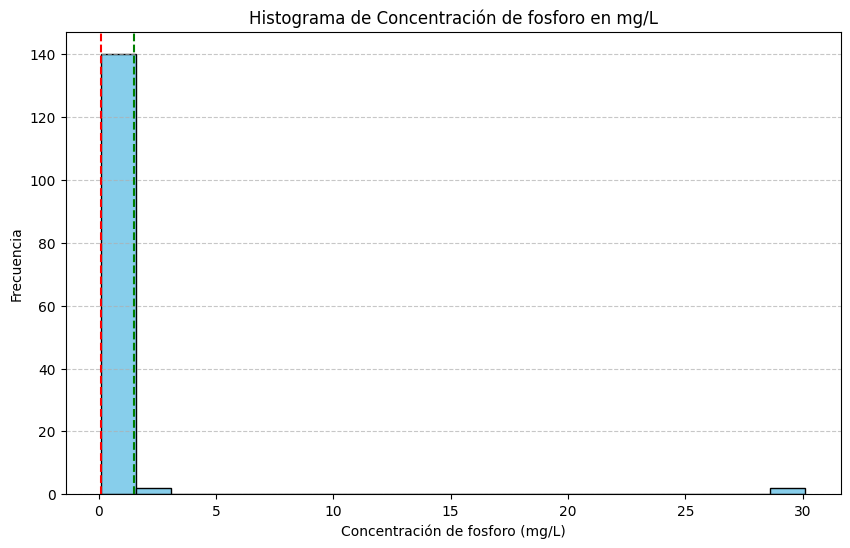

In [346]:
plt.figure(figsize=(10, 6))
plt.hist(preprocessed_dataset['p_total_l_mg_l'], bins=20, color='skyblue', edgecolor='black')

plt.axvline(x=0.1, color='red', linestyle='--', linewidth=1.5, label='0.1 mg/L')
plt.axvline(x=1.5, color='green', linestyle='--', linewidth=1.5, label='1.5 mg/L')

plt.xlabel("Concentración de fosforo (mg/L)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Concentración de fosforo en mg/L")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Casi todos los valores se encuentran entre 0.1 mg/l y 1.5 mg/l por lo que la gran mayoría de las muestras cuentan con altas cantidades de fosforo.

fosf_ortofos_mg_l: Concentración de ortofosfatos en miligramos por litro (mg/L), que es un nutriente importante. Valor cuantitativo continuo.

Es otra forma del fosoforo, por lo que no aportaria informacion al analisis.

dbo_mg_l: Demanda biológica de oxígeno en miligramos por litro (mg/L), que mide la cantidad de oxígeno requerido por microorganismos para descomponer materia orgánica.

Agua Pura: desde 0 a 20 mg/litro Agua Levemente Contaminada: desde 20 a 100 mg/litro Agua Moderadamente Contaminada: desde 100 a 500 mg/litro Agua Muy Contaminada: desde 500 a 3.000 mg/litro Agua Extremadamente Contaminada: desde los 3.000 mg/litro

In [347]:
preprocessed_dataset['dbo_mg_l'].value_counts().sort_index()

dbo_mg_l
1.9     10
2.0      1
2.3      1
2.4      2
2.5      2
2.6      1
2.8      1
3.1      1
3.3      1
3.4      1
3.5      2
3.6      1
3.7      1
3.9      1
4.1      1
4.2      1
4.3      1
4.4      1
4.6      2
4.7      1
4.9      1
5.0      3
5.1      1
5.2      3
5.4      2
5.5      1
5.6      1
5.7      1
5.8      3
6.2      1
6.5      3
6.8      2
7.0      1
7.1      2
7.2      1
7.3      2
7.4      1
8.4      1
9.0      1
9.2      1
9.3      1
9.4      3
10.0     2
11.0     3
12.0     5
14.0     3
15.0     1
16.0     1
18.0     2
21.0     1
42.0     1
Name: count, dtype: int64

Se observan solo dos valores que indican que la muestra no fue tomada de agua pura y que esta levemente contaminada.

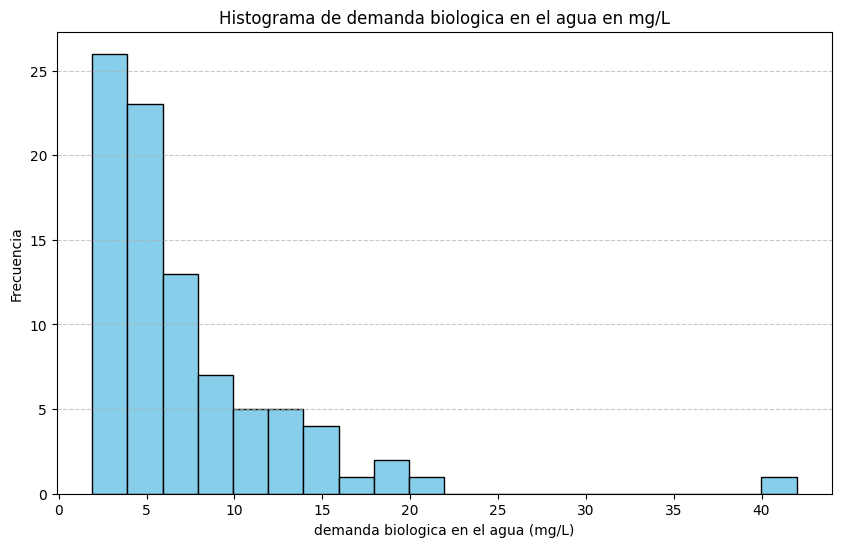

In [348]:
plt.figure(figsize=(10, 6))
plt.hist(preprocessed_dataset['dbo_mg_l'], bins=20, color='skyblue', edgecolor='black')


plt.xlabel("demanda biologica en el agua (mg/L)")
plt.ylabel("Frecuencia")
plt.title("Histograma de demanda biologica en el agua en mg/L")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La demanda biólogica en las muestras tomadas estan dentro de los valores esperados para agua pura exceptueando por dos muestras.

dqo_mg_l: Demanda química de oxígeno en miligramos por litro (mg/L), que mide la cantidad total de oxígeno requerido para oxidar materia orgánica e inorgánica.

El valor máximo para la Demanda Química de Oxígeno es de 500 mg/l.

In [349]:
preprocessed_dataset['dqo_mg_l'].value_counts().sort_index()

dqo_mg_l
110     1
130     1
135     1
180     1
29     27
30      3
31      1
32      2
33      3
34      2
35      1
36      3
37      1
39      4
41      1
42      1
46      2
47      1
48      3
49      2
53      1
54      2
56      1
57      1
58      1
59      2
60      1
62      2
63      2
64      2
65      1
66      1
67      1
69      1
70      1
71      1
72      2
74      1
75      1
77      1
80      2
82      2
84      1
88      1
89      1
90      1
94      1
<30    51
<50     7
Name: count, dtype: int64

Los dos rangos encontrados se remplazan por valores cuantitativos, debido a que son valores pequños comparados con la mayoría de las muestras.

In [350]:
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace('<30', '28')
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace('<50', '40')
preprocessed_dataset["dqo_mg_l"] = preprocessed_dataset["dqo_mg_l"].astype("Int64")
preprocessed_dataset['dqo_mg_l'].value_counts().sort_index()

dqo_mg_l
28     51
29     27
30      3
31      1
32      2
33      3
34      2
35      1
36      3
37      1
39      4
40      7
41      1
42      1
46      2
47      1
48      3
49      2
53      1
54      2
56      1
57      1
58      1
59      2
60      1
62      2
63      2
64      2
65      1
66      1
67      1
69      1
70      1
71      1
72      2
74      1
75      1
77      1
80      2
82      2
84      1
88      1
89      1
90      1
94      1
110     1
130     1
135     1
180     1
Name: count, dtype: Int64

Sin la necesidad que graficar los datos se puede observar valores correctos para la demanda quimica de oxigeno. Graficamos para ver los datos cambiados.

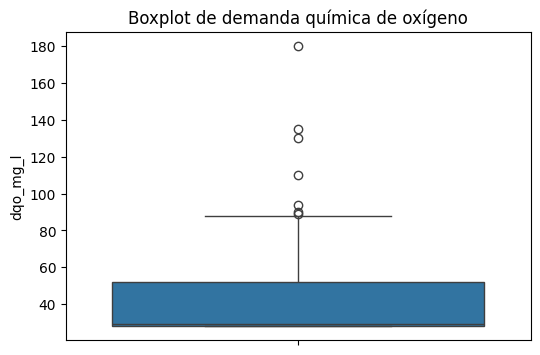

In [351]:
# Crear el boxplot con Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot( y="dqo_mg_l", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de demanda química de oxígeno')
plt.ylabel('dqo_mg_l')

# Mostrar el gráfico
plt.show()


turbiedad_ntu: Turbidez del agua medida en unidades NTU (Nephelometric Turbidity Units), que indica la claridad del agua.

Segun la OMS no debe superar las 5 NTU. Un valor elevado puede indicar contaminacion por prescencia de sediemntos en el agua.

In [352]:
preprocessed_dataset['turbiedad_ntu'].value_counts().sort_index()

turbiedad_ntu
2.5      1
3.3      1
4.1      1
6.0      1
7.5      1
8.9      1
9.3      1
10.0     1
11.0     2
12.0     7
13.0     5
14.0     3
15.0     1
16.0     4
17.0     5
18.0     4
18.2     1
19.0     6
20.0     1
21.0     1
22.0     6
23.0     5
24.0     1
25.0     5
26.0     5
27.0     2
28.0     5
29.0     3
30.0     4
31.0     3
32.0     1
33.0     3
34.0     4
35.0     3
36.0     1
37.0     3
38.0     1
39.0     4
40.0     1
45.0     6
48.0     1
50.0     3
54.0     1
55.0     2
60.0     5
65.0     3
67.0     1
70.0     3
71.0     1
75.0     3
80.0     2
84.0     1
85.0     2
90.0     5
110.0    1
130.0    1
Name: count, dtype: int64

A priori las muestras provienen de aguas con alto grado de turbiedad.

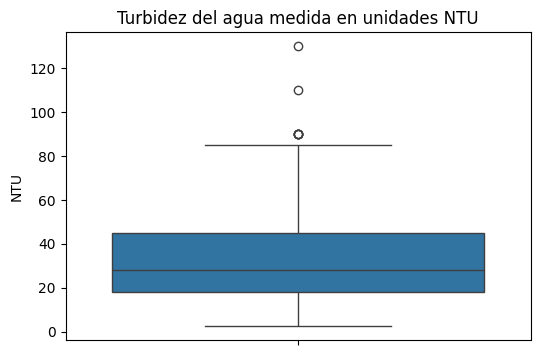

In [353]:
plt.figure(figsize=(6, 4))
sns.boxplot( y="turbiedad_ntu", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Turbidez del agua medida en unidades NTU')
plt.ylabel('NTU')

# Mostrar el gráfico
plt.show()

Los datos se concentran en valores que estan por encima del maximo recomendado por la OMS, lo cual sugiere una alta contaminacion por sedimentos.

hidr_deriv_petr_ug_l: Hidrocarburos derivados del petróleo en microgramos por litro (µg/L), que indican contaminación por productos petroleros.

In [354]:
preprocessed_dataset['hidr_deriv_petr_ug_l'].value_counts()

hidr_deriv_petr_ug_l
<0.10     113
 <0.10     35
 0.10       1
 0.20       1
Name: count, dtype: int64

Exceptuando una muestra, todas las muestras presentaron valores <=0.10 por lo que no es una variable que aporte informacion significativa al analisis.
Acomodamos los datos

In [355]:
#preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].replace( ' <0.10', '<10')
#preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].replace(' 0.10', '>=10')
#preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].replace(' 0.20', '>=10')

Representamos <10 con un 0, representamos >=10 con un 1

In [356]:
#preprocessed_dataset['hidr_deriv_petr_ug_l'] = (preprocessed_dataset['hidr_deriv_petr_ug_l'] == '<10').astype(int)
preprocessed_dataset['hidr_deriv_petr_ug_l'].value_counts()

hidr_deriv_petr_ug_l
<0.10     113
 <0.10     35
 0.10       1
 0.20       1
Name: count, dtype: int64

cr_total_mg_l: Concentración total de cromo en miligramos por litro (mg/L), un metal pesado que puede ser tóxico.

Según el EPA de Estados Unidos,el límite máximo de contaminantes (MCL) para el cromo total en el agua potable es de 0.1 mg/L.

No se puede sacar mucho acerca de este Atributo, no se trabajará en el.

In [357]:
preprocessed_dataset['cr_total_mg_l'].value_counts().sort_index()

cr_total_mg_l
0.005       2
0.0051      1
0.006       3
0.0061      2
0.0062      1
0.0064      1
0.0069      1
0.007       5
0.0079      1
0.008       1
0.0082      1
0.009       1
0.0095      1
0.01        1
0.011       2
0.015       1
0.02        1
10          1
12          1
5           2
6           4
7           2
8           1
<0.005    113
<5.0        1
Name: count, dtype: int64

Casi todas las muestras se encuentran muy por debajo de ese maximo, algunas casi ni registran prescencia de este metal. Ajustamos todos los valores a numéricos.

In [358]:
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace('<0.005', '0.004')
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace('<5.0', '4.5')
preprocessed_dataset['cr_total_mg_l'] = pd.to_numeric(preprocessed_dataset['cr_total_mg_l'], errors='coerce')
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].astype(float)
preprocessed_dataset['cr_total_mg_l'].value_counts().sort_index()

cr_total_mg_l
0.0040     113
0.0050       2
0.0051       1
0.0060       3
0.0061       2
0.0062       1
0.0064       1
0.0069       1
0.0070       5
0.0079       1
0.0080       1
0.0082       1
0.0090       1
0.0095       1
0.0100       1
0.0110       2
0.0150       1
0.0200       1
4.5000       1
5.0000       2
6.0000       4
7.0000       2
8.0000       1
10.0000      1
12.0000      1
Name: count, dtype: int64

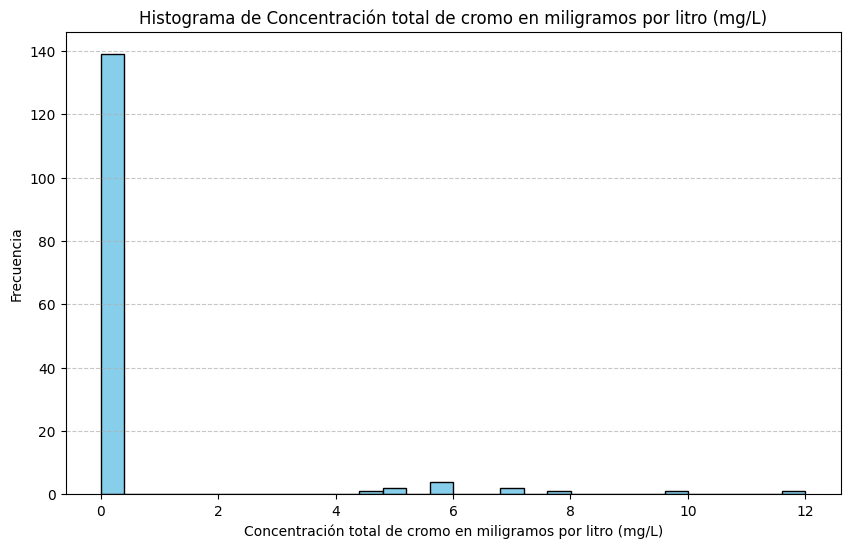

In [359]:
plt.figure(figsize=(10, 6))
plt.hist(preprocessed_dataset['cr_total_mg_l'], bins=30, color='skyblue', edgecolor='black')


plt.xlabel("Concentración total de cromo en miligramos por litro (mg/L)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Concentración total de cromo en miligramos por litro (mg/L)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

cd_total_mg_l: Concentración total de cadmio en miligramos por litro (mg/L), otro metal pesado que es tóxico en altas concentraciones.

La concentración de cadmio en el agua potable no debe exceder los 0,005 mg/L, según la FDA.

In [360]:
preprocessed_dataset['cd_total_mg_l'].value_counts().sort_index()

cd_total_mg_l
<0.001    147
<0.002      4
Name: count, dtype: int64

En las muestras tomadas casi mo hay prescencia de este metal, por lo que su analisis no aporta informacion.

clorofila_a_ug_l: Concentración de clorofila a en microgramos por litro (µg/L), que indica la cantidad de fitoplancton en el agua.

Según la OCDE, los valores se clasifican en:

Ultraoligotróficos: < 2,5 µg Clo a/L (extremadamente pobres en nutrientes, tienen muy poca biomasa algal)

Oligotrófico: 2.5 - 8,0 µg Clo a/L (pobres en nutrientes pero tienen una mayor cantidad de biomasa algal que los ultraoligotróficos, aguas mas claras)

Mesotrófico: 8,0 - 25 µg Clo a/L ( niveles moderados de nutrientes y una cantidad moderada de biomasa algal)

Eutrófico: 25 - 75 µg Clo a/L ( ricos en nutrientes y tienen una gran cantidad de biomasa algal. Pueden experimentar floraciones algales y tener        
problemas de calidad del agua, como la disminución del oxígeno disuelto)

Hipertrófico: > 75 µg Clo a/L (extremadamente enriquecidos en nutrientes y tienen una biomasa algal muy alta. Son aguas turbias, con una baja calidad ecológica y problemas severos como la pérdida de biodiversidad y la producción de olores desagradables.)

In [361]:
preprocessed_dataset['clorofila_a_ug_l'].value_counts().sort_index()

clorofila_a_ug_l
0.0       5
0.1       1
0.2       2
0.3       3
0.4       1
0.5       1
0.6       2
0.7       1
0.8       1
1.0       1
10.5      1
1030      1
11.7      1
120       1
1270      1
1290      1
13.4      1
130.2     1
140.8     1
1400      1
16.7      1
164.9     1
17.0      1
17.4      1
1730      1
1960      1
2.1       1
20.2      1
20.7      1
200       1
2130      1
220       1
250       1
2500      1
28        1
28.8      1
280       1
29.4      1
2900      1
3.1       1
310       1
350       2
3590      1
36.5      1
40.9      1
414.8     1
42.1      1
4650      1
48.0      1
5.9       1
54.1      1
560       1
6.4       1
63.7      1
630       1
6410      1
70.8      1
720       1
74.2      1
740       1
760       1
77.2      1
8.2       1
8.5       1
870       1
92.4      1
930       1
<10      74
Name: count, dtype: int64

In [362]:
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace('<10', '9.5')
#9.5 es un valor ínfimo comparado con otros valores.
preprocessed_dataset['clorofila_a_ug_l'] = pd.to_numeric(preprocessed_dataset['clorofila_a_ug_l'], errors='coerce')
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].astype(float)
preprocessed_dataset['clorofila_a_ug_l'].value_counts().sort_index()

clorofila_a_ug_l
0.0        5
0.1        1
0.2        2
0.3        3
0.4        1
0.5        1
0.6        2
0.7        1
0.8        1
1.0        1
2.1        1
3.1        1
5.9        1
6.4        1
8.2        1
8.5        1
9.5       74
10.5       1
11.7       1
13.4       1
16.7       1
17.0       1
17.4       1
20.2       1
20.7       1
28.0       1
28.8       1
29.4       1
36.5       1
40.9       1
42.1       1
48.0       1
54.1       1
63.7       1
70.8       1
74.2       1
77.2       1
92.4       1
120.0      1
130.2      1
140.8      1
164.9      1
200.0      1
220.0      1
250.0      1
280.0      1
310.0      1
350.0      2
414.8      1
560.0      1
630.0      1
720.0      1
740.0      1
760.0      1
870.0      1
930.0      1
1030.0     1
1270.0     1
1290.0     1
1400.0     1
1730.0     1
1960.0     1
2130.0     1
2500.0     1
2900.0     1
3590.0     1
4650.0     1
6410.0     1
Name: count, dtype: int64

Los resultados estan muy dispersos, pero en general se mueven entre el 0 y 25.

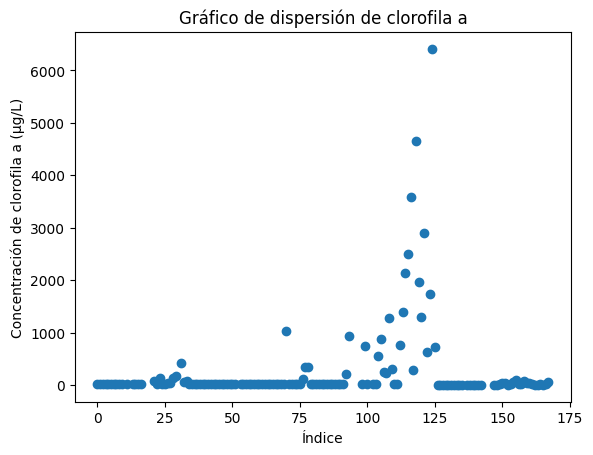

In [363]:
plt.scatter(preprocessed_dataset.index, preprocessed_dataset['clorofila_a_ug_l'])

# Personalizar el gráfico
plt.xlabel('Índice')
plt.ylabel('Concentración de clorofila a (µg/L)')
plt.title('Gráfico de dispersión de clorofila a')

# Mostrar el gráfico
plt.show()

microcistina_ug_l: Concentración de microcistinas en microgramos por litro (µg/L), que son toxinas producidas por ciertas algas.

In [364]:
preprocessed_dataset["microcistina_ug_l"].value_counts().sort_index()

microcistina_ug_l
0.19       1
0.2        1
0.3        1
0.4        1
1          2
1.67       1
<0.15     76
<0.20     30
 0.21      1
 0.23      1
 0.25      1
 0.57      1
 <0.15    33
Name: count, dtype: int64

limpiamos la columna para asi convertirla a float.

In [365]:
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace('<0.20', '0.19')  
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(r'^\s*<0.15\s*$', 0.14, regex=True)
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(r'^\s*0.21\s*$', 0.21, regex=True)
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(r'^\s*0.23\s*$', 0.23, regex=True)
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(r'^\s*0.25\s*$', 0.25, regex=True)
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(r'^\s*0.57\s*$', 0.57, regex=True)
preprocessed_dataset['microcistina_ug_l'] = pd.to_numeric(preprocessed_dataset['microcistina_ug_l'], errors='coerce')
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].astype(float)
preprocessed_dataset["microcistina_ug_l"].value_counts().sort_index()

microcistina_ug_l
0.14    109
0.19     31
0.20      1
0.21      1
0.23      1
0.25      1
0.30      1
0.40      1
0.57      1
1.00      2
1.67      1
Name: count, dtype: int64

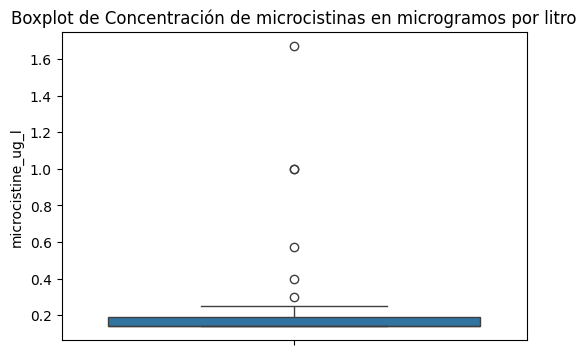

In [366]:
# Crear el boxplot con Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot( y="microcistina_ug_l", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de Concentración de microcistinas en microgramos por litro')
plt.ylabel('microcistine_ug_l')

# Mostrar el gráfico
plt.show()

Se dejan los outliers para ver el análisis bivariado.

ICA: Índice de calidad del agua, que puede ser un valor calculado para evaluar la calidad general del agua. Atributo numérico discreto.

In [367]:
preprocessed_dataset['ica'].value_counts().sort_index()

ica
23     1
25     1
29     2
31     1
32     2
33     4
34     3
35     5
36     9
37    10
38     8
39     7
40    13
41     7
42    10
43     3
44     6
45     7
46     7
47     1
48     2
49     3
50     6
51     4
52     2
53     2
54     2
55     6
56     2
57     1
58     4
59     5
60     2
61     2
62     1
64     1
67     1
76     1
Name: count, dtype: Int64

No se ven valores a limpiar, se pasa la columna a Int.

In [368]:
preprocessed_dataset["ica"] = preprocessed_dataset["ica"].astype("Int64")

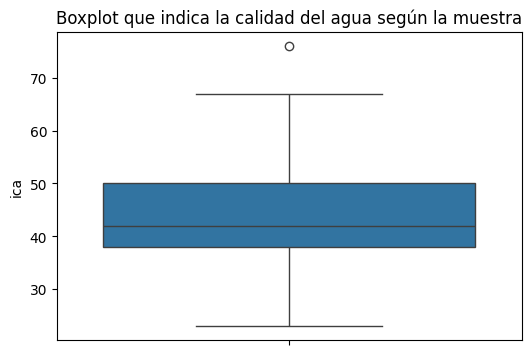

In [369]:
# Crear el boxplot con Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot( y="ica", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot que indica la calidad del agua según la muestra')
plt.ylabel('ica')

# Mostrar el gráfico
plt.show()

El outlier no es excesivo, no se le elimina.

Nos fijamos si luego de todos los análisis quedaron filas repetidas.

In [370]:
raw_dataset.duplicated().sum()

np.int64(0)

In [371]:
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 167
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   sitios                                      154 non-null    object 
 1   codigo                                      154 non-null    Int64  
 2   fecha                                       154 non-null    object 
 3   campaña                                     154 non-null    object 
 4   tem_agua                                    144 non-null    float64
 5   tem_aire                                    143 non-null    float64
 6   od                                          131 non-null    float64
 7   ph                                          111 non-null    float64
 8   olores                                      154 non-null    int64  
 9   color                                       154 non-null    int64  
 10  espumas            

Finalizado el análisis univariado.

ANÁLISIS BIVARIADO:

Descarte de las columnas que son tipo object asi se puede realizar la matriz de correlación.

In [376]:
columas_a_excluir = ['sitios', 'fecha', 'campaña', 'hidr_deriv_petr_ug_l', 'cd_total_mg_l']
dataset_para_matriz = preprocessed_dataset.drop(columns=columas_a_excluir)
matriz_corr = dataset_para_matriz.corr()

En esta matriz tenemos un resumen completo del comportamiento bivariado de todas las variables del conjunto, según el coeficiente de correlación. Buscaremos representarlas con un mapa de calor.

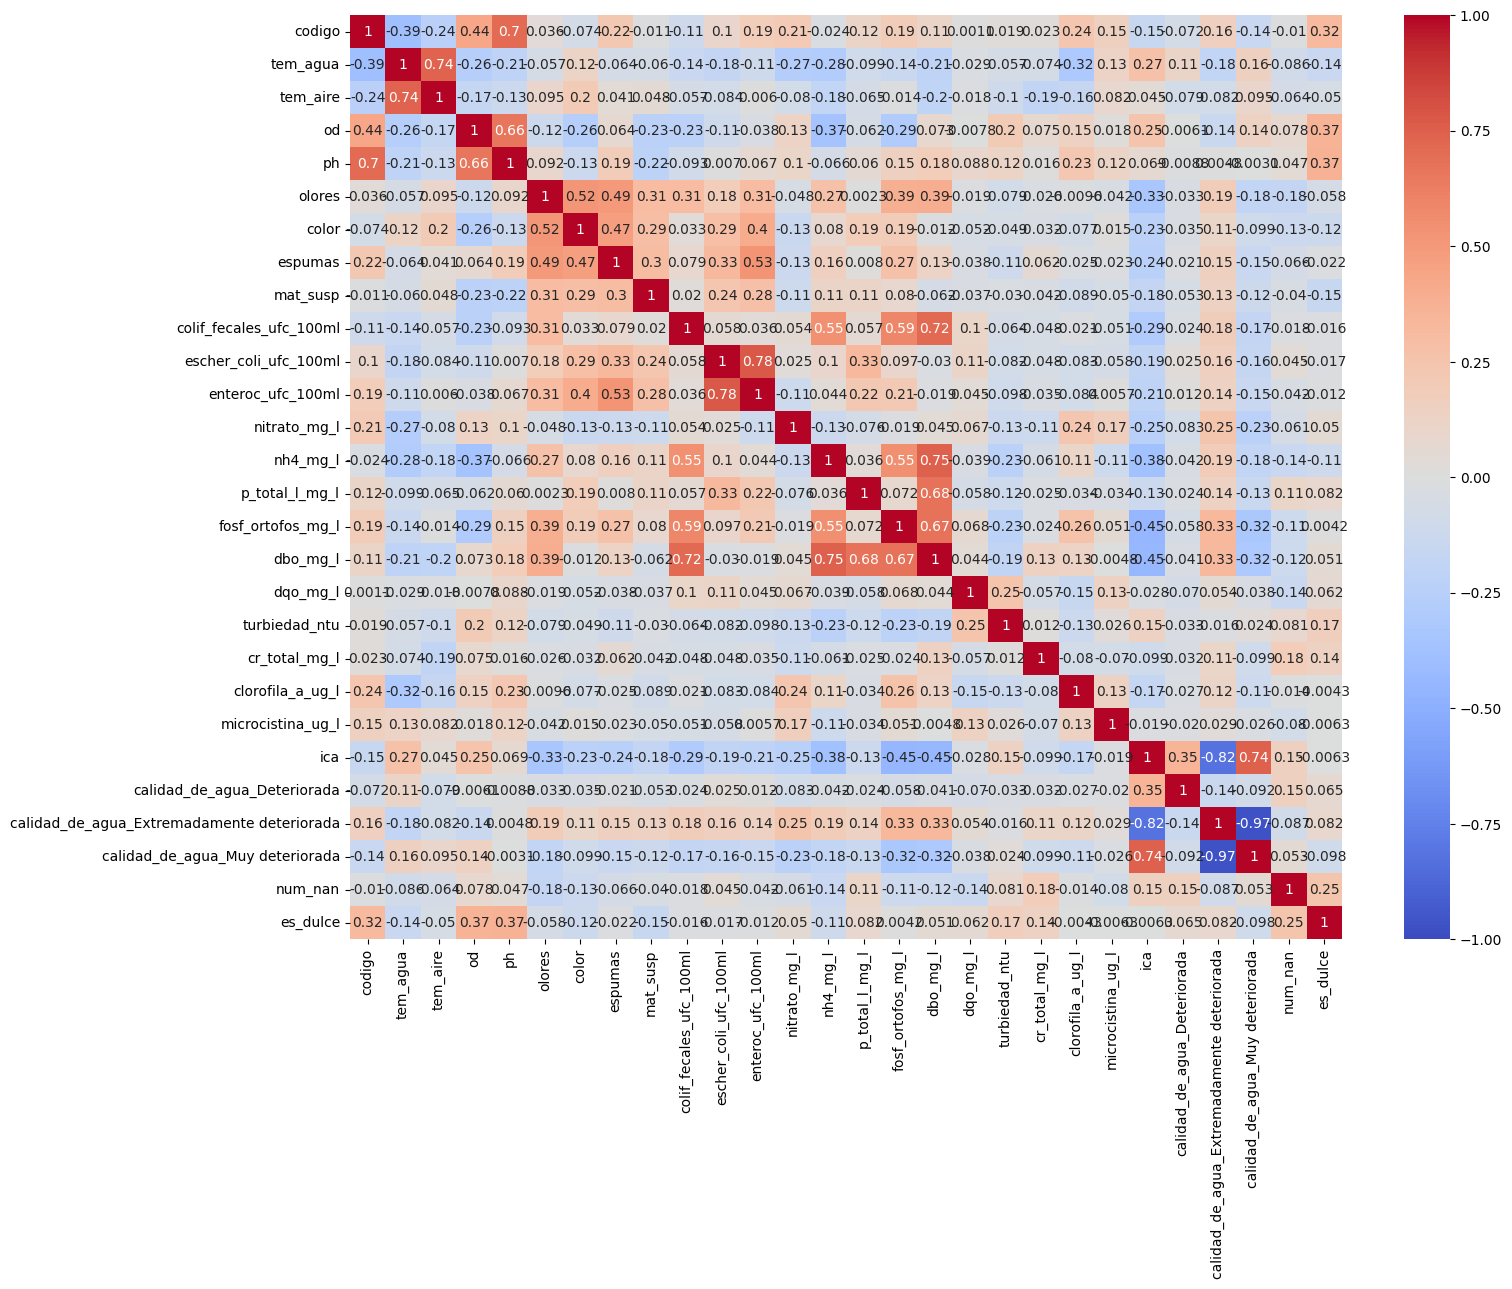

In [377]:
plt.figure(figsize=(16,12))
sns.heatmap(matriz_corr, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

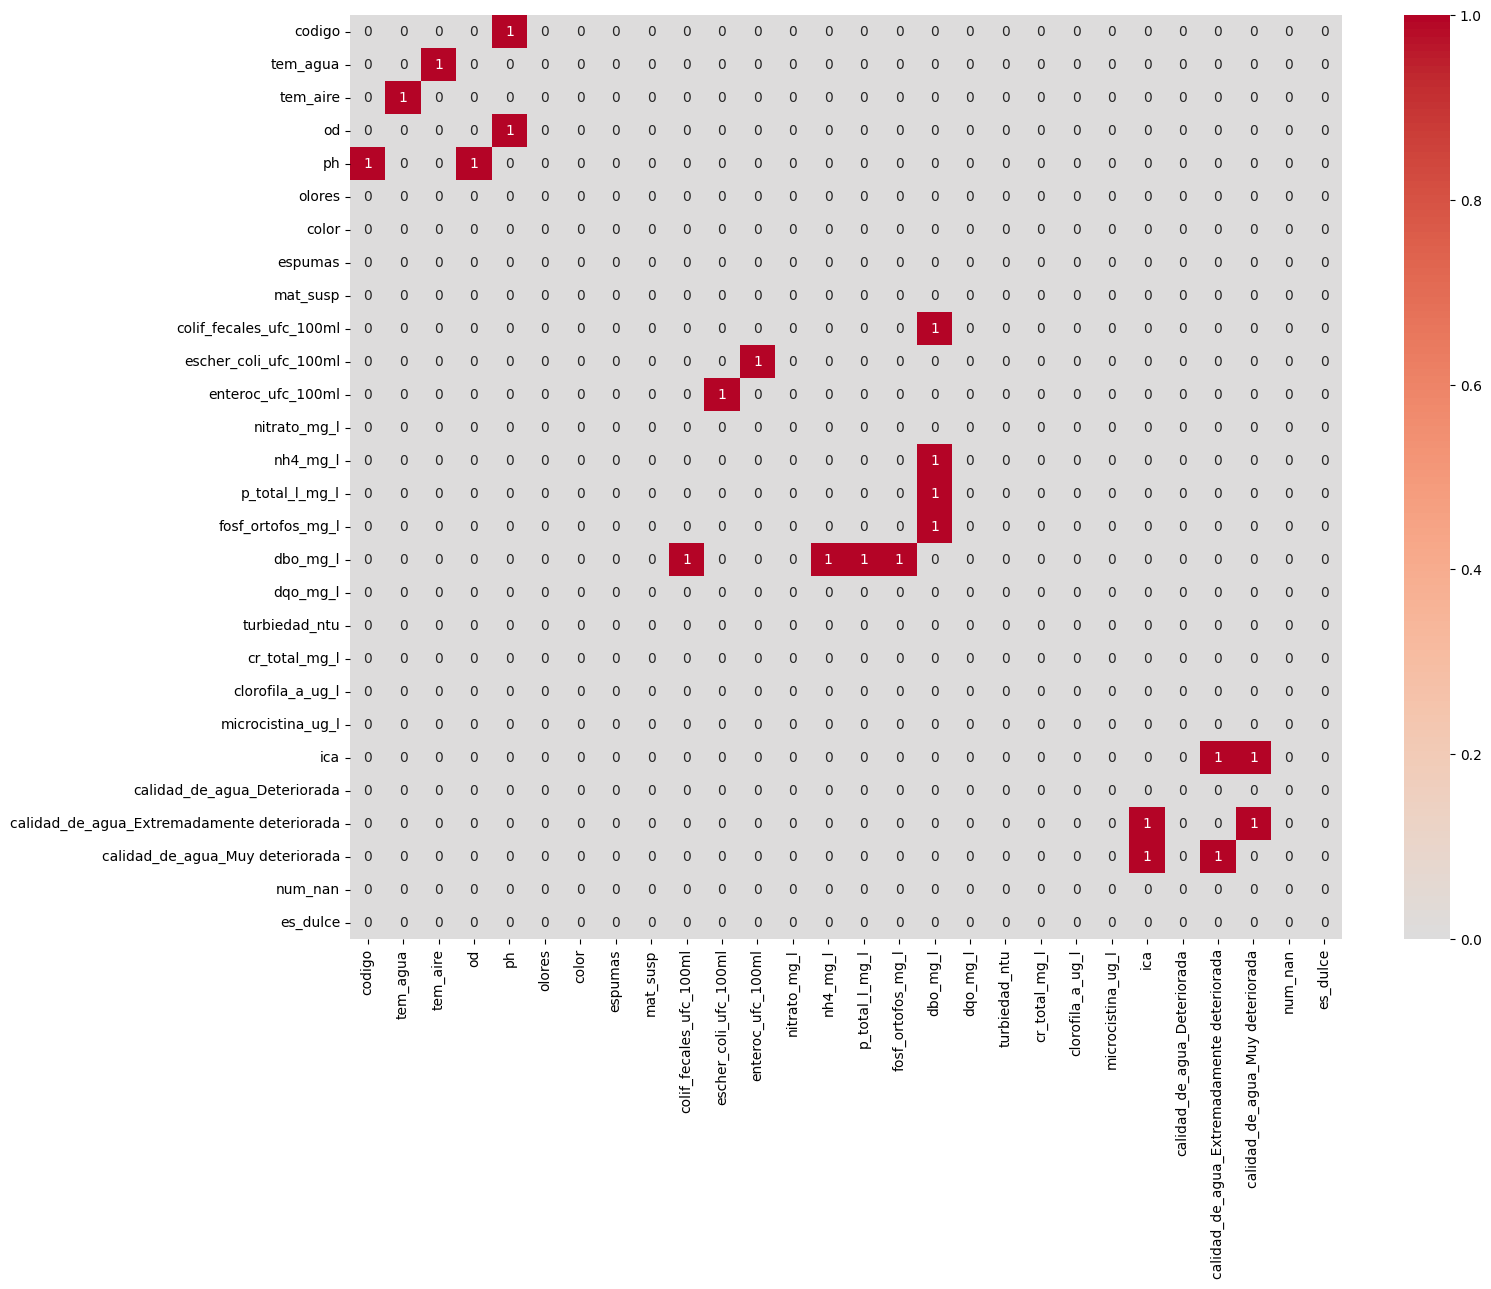

In [ ]:
import numpy as np

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.6. Partimos de un índice bajo para acaparar mas opciones.
correlation_matrix_umbralizada = matriz_corr.abs() > 0.6

# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Vemos que ninguna calidad del agua se relaciona con otra columna. Como el objetivo de la investigación es analizarla buscaremos encontrar posibles vias que la puedan explicar. Primero para seguir con lo que encontramos, realizamos scatterplot a las posibles relaciones encontradas.

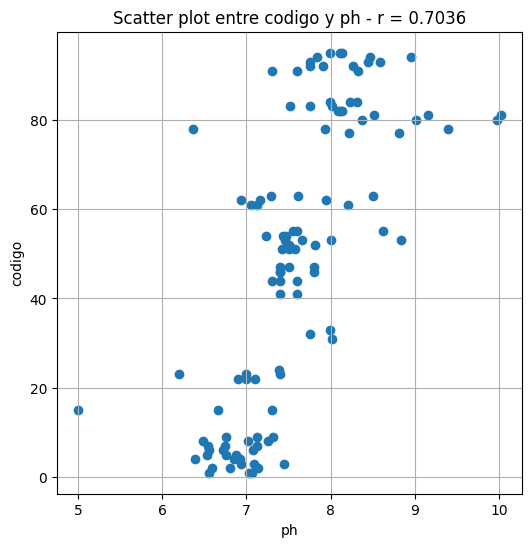

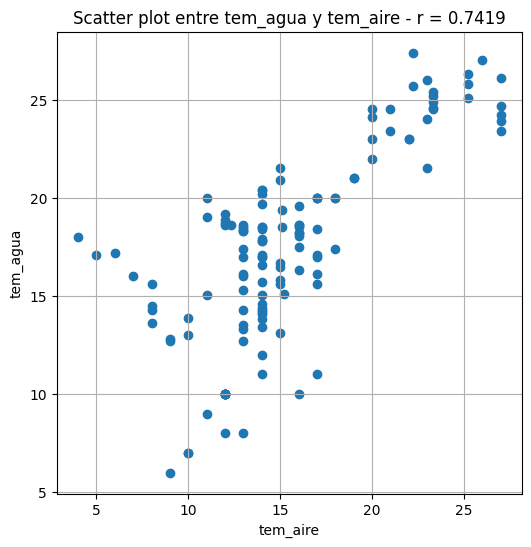

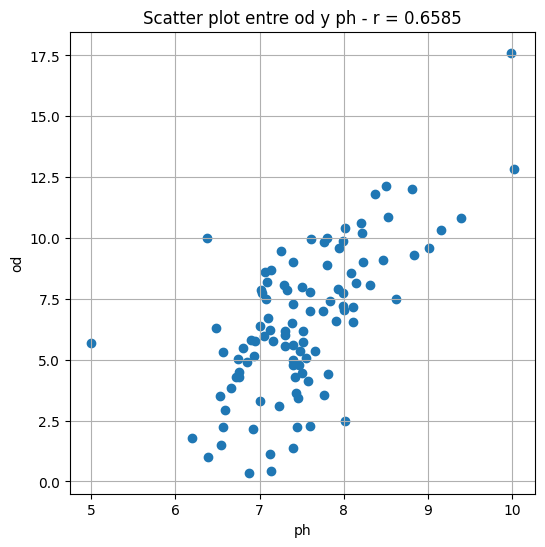

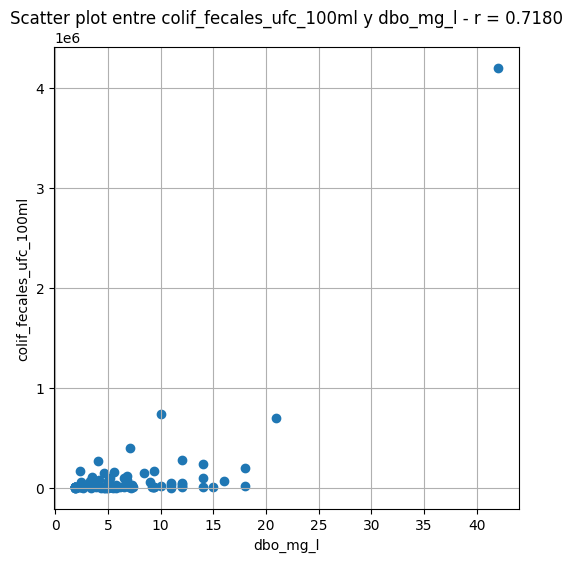

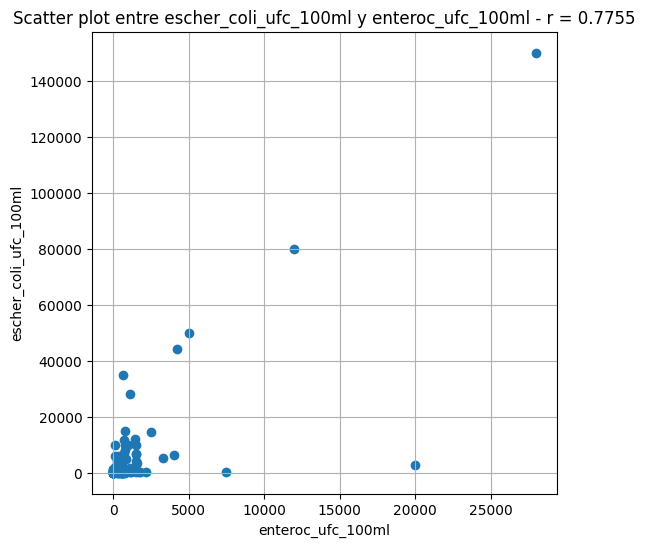

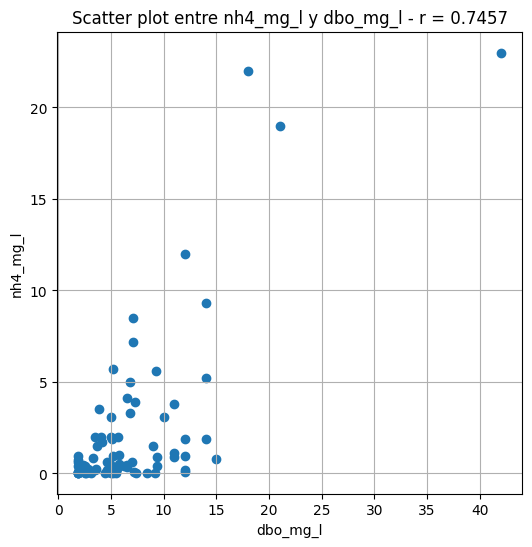

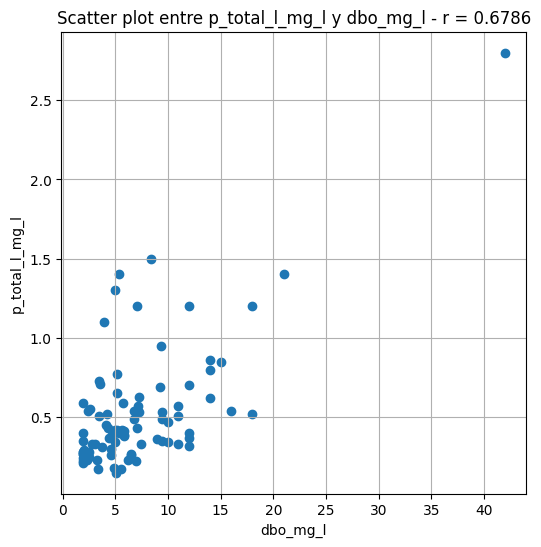

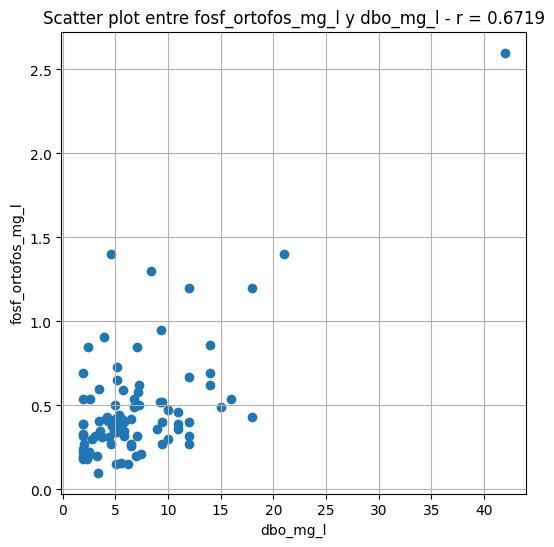

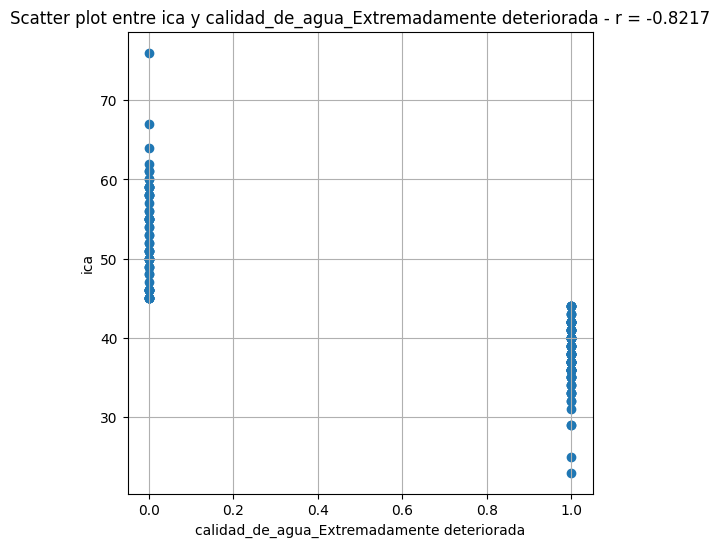

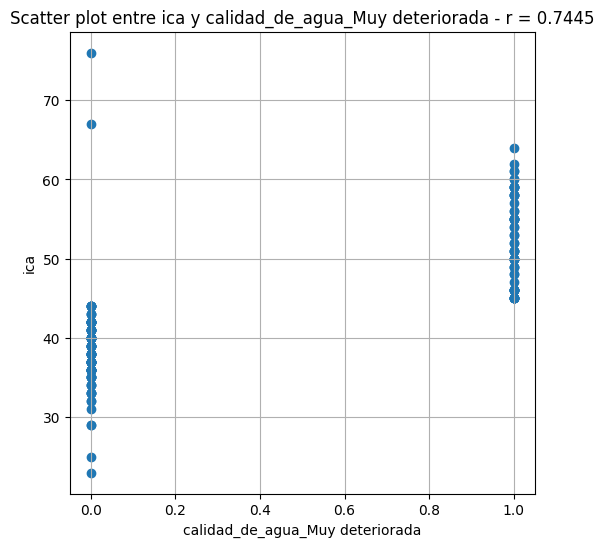

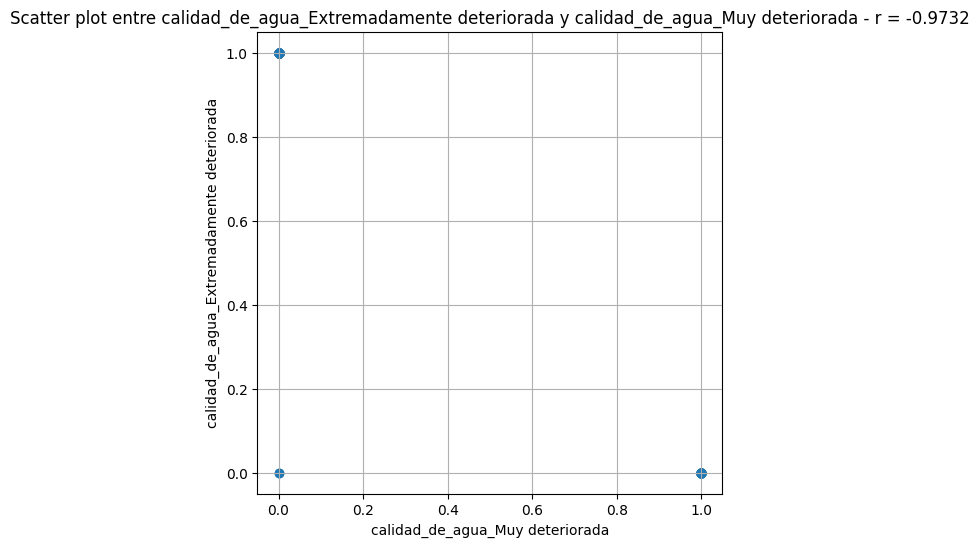

In [379]:
# iteramos por cada una de las columnas
for i, col in enumerate(correlation_matrix_umbralizada.columns):
  # y por cada una de las filas (para eso usamos el índice)
  for j in range(i,len(correlation_matrix_umbralizada.index)):
    # extraemos el nombre de la fila en la que estamos
    row = correlation_matrix_umbralizada.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada
    if correlation_matrix_umbralizada.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = matriz_corr.loc[row, col]
      # representamos en un scatter plot cuadrado los valores de ambas variables
      plt.figure(figsize=(6, 6))
      plt.scatter(preprocessed_dataset[row], preprocessed_dataset[col])
      # y lo mostramos bonito
      plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.grid(True)
      plt.show()